In [74]:
pip install fastdtw

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3586 sha256=e3a7792d99337337ae22d25dfaa94c52f17ba0a339e5d67c060269cd982513f0
  Stored in directory: c:\users\shri\appdata\local\pip\cache\wheels\ab\d0\26\b82cb0f49ae73e5e6bba4e8462fff2c9851d7bd2ec64f8891e
Successfully built fastdtw
Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pyaudio
import wave
import librosa
import numpy as np
import numba
import matplotlib.pyplot as plt
# from librosa import cosine, eulidean
import IPython.display as ipd
import librosa.display
import torchaudio
from scipy.spatial.distance import euclidean, cosine
from librosa.sequence import dtw
import sounddevice as sd
import numpy as np
import wave
import os
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch
from speechbrain.inference.speaker import EncoderClassifier
import json
import io
import wave
from fastdtw import fastdtw
import pandas as pd

import librosa
import noisereduce as nr
import soundfile as sf
import scipy.fftpack as fft
from scipy.signal import medfilt


# import numpy as np
# import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from pydub import AudioSegment


In [2]:
# frames

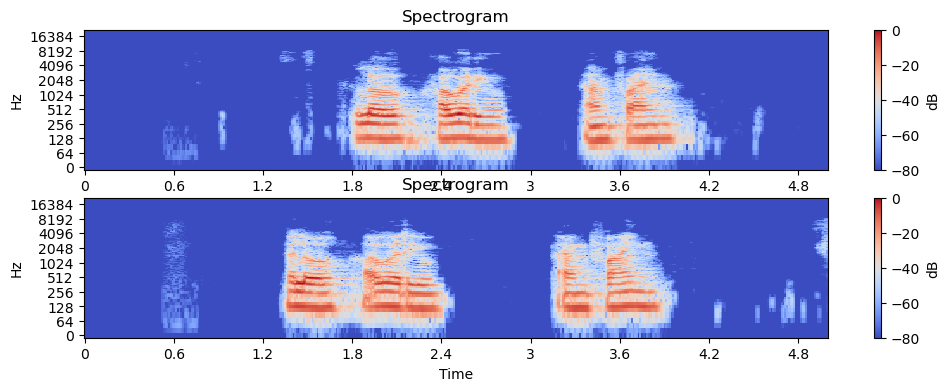

In [29]:

# Convert audio to Spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
D_2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)


# Plot Spectrogram
plt.figure(figsize=(12, 4))
plt.subplot(2,1,1)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", cmap="coolwarm")
plt.colorbar(label="dB")
plt.title("Spectrogram")


plt.subplot(2,1,2)
librosa.display.specshow(D_2, sr=sr, x_axis="time", y_axis="log", cmap="coolwarm")
plt.colorbar(label="dB")
plt.title("Spectrogram")

plt.show()


In [30]:
from scipy.fft import fft

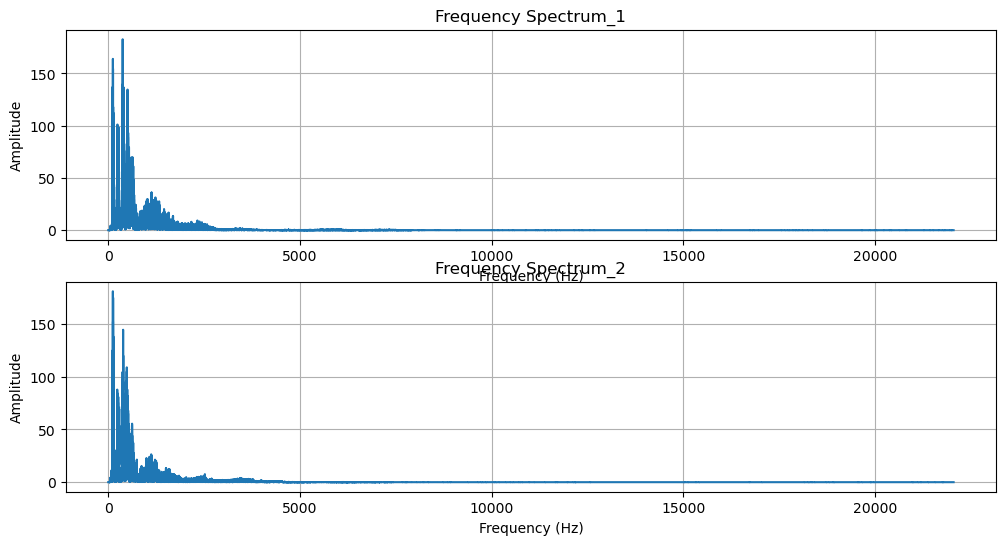

In [34]:
# Compute Fourier Transform
N = len(y)
yf = fft(y)
xf = np.linspace(0, sr/2, N//2)  # Frequency axis

N2 = len(y2)
yf2 = fft(y2)
xf2 = np.linspace(0, sr/2, N//2)

# Plot Frequency Spectrum
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(xf, np.abs(yf[:N//2]))
plt.title("Frequency Spectrum_1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(xf2, np.abs(yf2[:N//2]))
plt.title("Frequency Spectrum_2")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.grid()
plt.show()


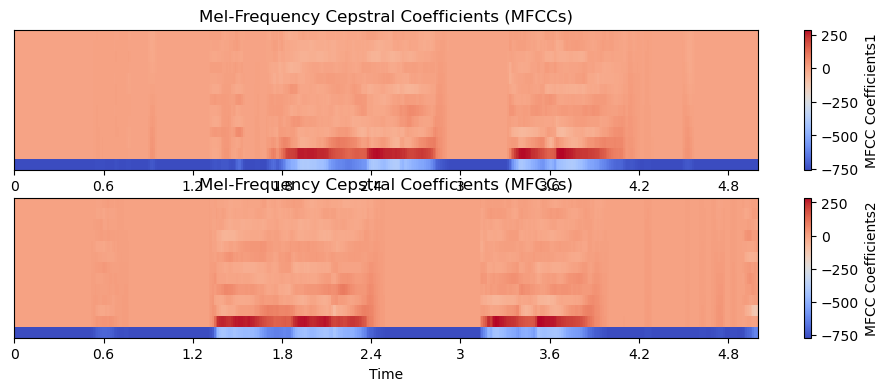

In [35]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_2 = librosa.feature.mfcc(y=y2, sr=sr, n_mfcc = 13)

# Plot MFCCs
plt.figure(figsize=(12, 4))
plt.subplot(2,1,1)
librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="coolwarm")
plt.colorbar(label="MFCC Coefficients1")
plt.title("Mel-Frequency Cepstral Coefficients (MFCCs)")

plt.subplot(2,1,2)
librosa.display.specshow(mfccs_2, sr=sr, x_axis="time", cmap="coolwarm")
plt.colorbar(label="MFCC Coefficients2")
plt.title("Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()


In [39]:
mfccs.size

5603

In [40]:
mfccs_2.shape

(13, 431)

🔹 Euclidean Distance: 17.79251480102539
🔹 DTW Distance: 3906041.607448766


C:\Users\shri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


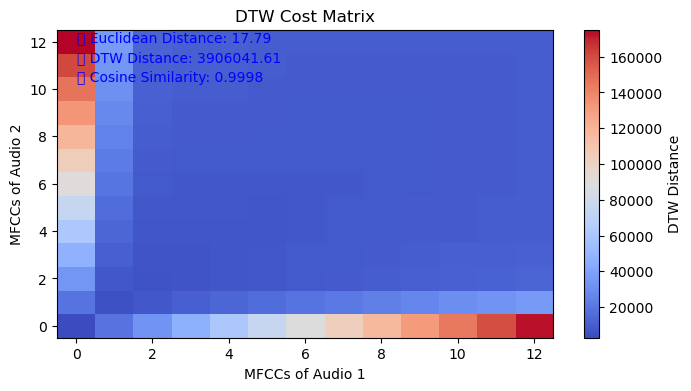

In [50]:
# Align MFCCs using Dynamic Time Warping (DTW)
D, wp = dtw(mfccs.T, mfccs_2.T, metric='euclidean')

# Compute similarity scores
euclidean_dist = euclidean(mfccs.mean(axis=1), mfccs_2.mean(axis=1))
dtw_dist = np.sum(D)

# Compute Cosine Similarity (Closer to 1 means higher similarity)
cosine_sim = 1 - cosine(mfccs.mean(axis=1), mfccs_2.mean(axis=1))

print(f"🔹 Euclidean Distance: {euclidean_dist}")
print(f"🔹 DTW Distance: {dtw_dist}")

# Plot DTW Alignment
plt.figure(figsize=(8, 4))
plt.imshow(D, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label="DTW Distance")
plt.title("DTW Cost Matrix")
plt.xlabel("MFCCs of Audio 1")
plt.ylabel("MFCCs of Audio 2")
plt.figtext(0.15, 0.85, f"🔹 Euclidean Distance: {euclidean_dist:.2f}", fontsize=10, color='blue')
plt.figtext(0.15, 0.80, f"🔹 DTW Distance: {dtw_dist:.2f}", fontsize=10, color='blue')
plt.figtext(0.15, 0.75, f"🔹 Cosine Similarity: {cosine_sim:.4f}", fontsize=10, color='blue')

plt.show()

Recording a third voice with different content to see if the cosine similarity between them is high or not

In [51]:

stream = p.open(format=format, channels=channels, rate=sample_rate, input=True, frames_per_buffer=chunk)

frames = []
for _ in range(0, int(sample_rate / chunk * record_seconds)):
    data = stream.read(chunk)
    frames.append(data)

print("✅ Recording finished!")

# Stop and close stream
stream.stop_stream()
stream.close()
p.terminate()

# Save the audio
wf = wave.open("recorded_audio_2.wav", "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(format))
wf.setframerate(sample_rate)
wf.writeframes(b''.join(frames))
wf.close()

print("🎵 Audio saved as 'recorded_audio_3.wav'")

🎤 Recording... Speak now!
✅ Recording finished!
🎵 Audio saved as 'recorded_audio_3.wav'


In [55]:
ipd.Audio("recorded_audio_2.wav")


In [39]:
audio_file = "recorded_audio.wav"  # Replace with your file
audio_file_2 = "recorded_audio_2.wav"

y, sr = librosa.load(audio_file, sr=None)  # y = audio signal, sr = sample rate
y2 , sr2 = librosa.load(audio_file_2,sr = None)


In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc = 13)

🔹 Euclidean Distance: 96.55012512207031
🔹 DTW Distance: 4310025.84341622


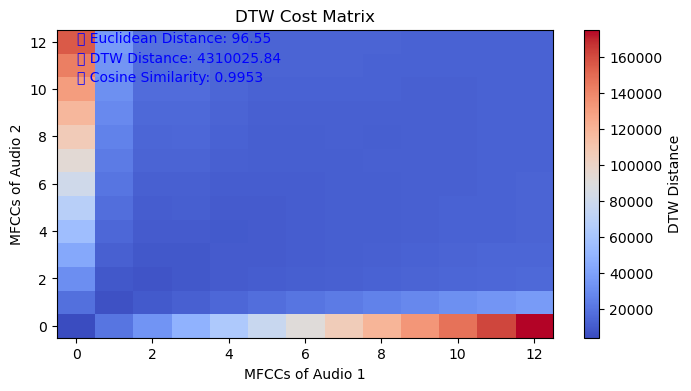

In [58]:
# Align MFCCs using Dynamic Time Warping (DTW)
D, wp = dtw(mfccs.T, mfccs_2.T, metric='euclidean')

# Compute similarity scores
euclidean_dist = euclidean(mfccs.mean(axis=1), mfccs_2.mean(axis=1))
dtw_dist = np.sum(D)

# Compute Cosine Similarity (Closer to 1 means higher similarity)
cosine_sim = 1 - cosine(mfccs.mean(axis=1), mfccs_2.mean(axis=1))

print(f"🔹 Euclidean Distance: {euclidean_dist}")
print(f"🔹 DTW Distance: {dtw_dist}")

# Plot DTW Alignment
plt.figure(figsize=(8, 4))
plt.imshow(D, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label="DTW Distance")
plt.title("DTW Cost Matrix")
plt.xlabel("MFCCs of Audio 1")
plt.ylabel("MFCCs of Audio 2")
plt.figtext(0.15, 0.85, f"🔹 Euclidean Distance: {euclidean_dist:.2f}", fontsize=10, color='blue')
plt.figtext(0.15, 0.80, f"🔹 DTW Distance: {dtw_dist:.2f}", fontsize=10, color='blue')
plt.figtext(0.15, 0.75, f"🔹 Cosine Similarity: {cosine_sim:.4f}", fontsize=10, color='blue')

plt.show()

In [60]:
p = pyaudio.PyAudio()
print("🎤 Recording... Speak now!")
stream = p.open(format=format, channels=channels, rate=sample_rate, input=True, frames_per_buffer=chunk)

frames = []
for _ in range(0, int(sample_rate / chunk * record_seconds)):
    data = stream.read(chunk)
    frames.append(data)

print("✅ Recording finished!")

# Stop and close stream
stream.stop_stream()
stream.close()
p.terminate()

# Save the audio
wf = wave.open("recorded_audio_a1.wav", "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(format))
wf.setframerate(sample_rate)
wf.writeframes(b''.join(frames))
wf.close()

print("🎵 Audio saved as 'recorded_audio_ai.wav'")

🎤 Recording... Speak now!
✅ Recording finished!
🎵 Audio saved as 'recorded_audio_ai.wav'


In [63]:
ipd.Audio("recorded_audio_a1.wav")

In [64]:
y_a1 , sr_a1 = librosa.load("recorded_audio_a1.wav", sr = None )
mfcc_a1 = librosa.feature.mfcc(y= y_a1 , sr = sr_a1 , n_mfcc = 13)

🔹 Euclidean Distance: 114.45077514648438
🔹 DTW Distance: 4598075.107914056


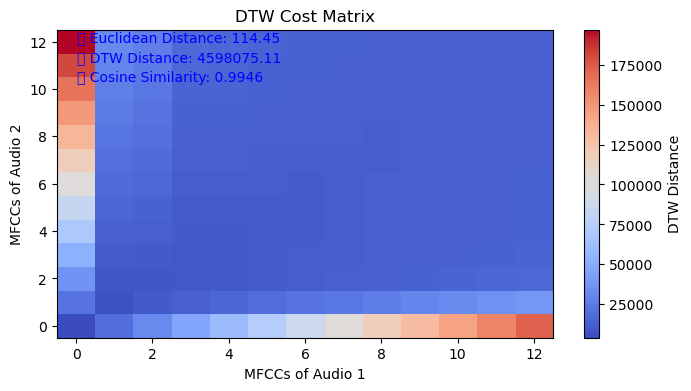

In [65]:
# Align MFCCs using Dynamic Time Warping (DTW)
D, wp = dtw(mfccs.T, mfcc_a1.T, metric='euclidean')

# Compute similarity scores
euclidean_dist = euclidean(mfccs.mean(axis=1), mfcc_a1.mean(axis=1))
dtw_dist = np.sum(D)

# Compute Cosine Similarity (Closer to 1 means higher similarity)
cosine_sim = 1 - cosine(mfccs.mean(axis=1), mfcc_a1.mean(axis=1))

print(f"🔹 Euclidean Distance: {euclidean_dist}")
print(f"🔹 DTW Distance: {dtw_dist}")

# Plot DTW Alignment
plt.figure(figsize=(8, 4))
plt.imshow(D, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label="DTW Distance")
plt.title("DTW Cost Matrix")
plt.xlabel("MFCCs of Audio 1")
plt.ylabel("MFCCs of Audio 2")
plt.figtext(0.15, 0.85, f"🔹 Euclidean Distance: {euclidean_dist:.2f}", fontsize=10, color='blue')
plt.figtext(0.15, 0.80, f"🔹 DTW Distance: {dtw_dist:.2f}", fontsize=10, color='blue')
plt.figtext(0.15, 0.75, f"🔹 Cosine Similarity: {cosine_sim:.4f}", fontsize=10, color='blue')

plt.show()

In [79]:
ipd.Audio("recorded_audio.wav")

In [81]:
ipd.Audio("recorded_audio_2.wav")

In [1]:
y_1 , sr_1 = librosa.load("recorded_audio.wav", sr = None )
mfcc_1 = librosa.feature.mfcc(y= y_1 , sr = sr_1 , n_mfcc = 40)

y_2 , sr_2 = librosa.load("recorded_audio_2.wav", sr = None )
mfcc_2 = librosa.feature.mfcc(y= y_2 , sr = sr_2 , n_mfcc = 40)

NameError: name 'librosa' is not defined

🔹 Euclidean Distance: 65.2038803100586
🔹 DTW Distance: 52279442.55860902


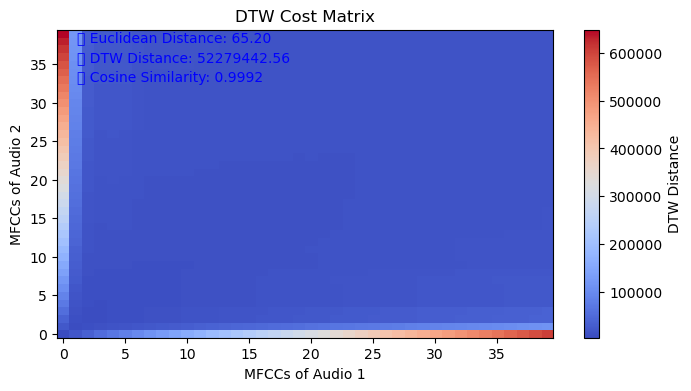

In [84]:
# Align MFCCs using Dynamic Time Warping (DTW)
D, wp = dtw(mfcc_1.T, mfcc_2.T, metric='euclidean')

# Compute similarity scores
euclidean_dist = euclidean(mfcc_1.mean(axis=1), mfcc_2.mean(axis=1))
dtw_dist = np.sum(D)

# Compute Cosine Similarity (Closer to 1 means higher similarity)
cosine_sim = 1 - cosine(mfcc_1.mean(axis=1), mfcc_2.mean(axis=1))

print(f"🔹 Euclidean Distance: {euclidean_dist}")
print(f"🔹 DTW Distance: {dtw_dist}")

# Plot DTW Alignment
plt.figure(figsize=(8, 4))
plt.imshow(D, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label="DTW Distance")
plt.title("DTW Cost Matrix")
plt.xlabel("MFCCs of Audio 1")
plt.ylabel("MFCCs of Audio 2")
plt.figtext(0.15, 0.85, f"🔹 Euclidean Distance: {euclidean_dist:.2f}", fontsize=10, color='blue')
plt.figtext(0.15, 0.80, f"🔹 DTW Distance: {dtw_dist:.2f}", fontsize=10, color='blue')
plt.figtext(0.15, 0.75, f"🔹 Cosine Similarity: {cosine_sim:.4f}", fontsize=10, color='blue')

plt.show()

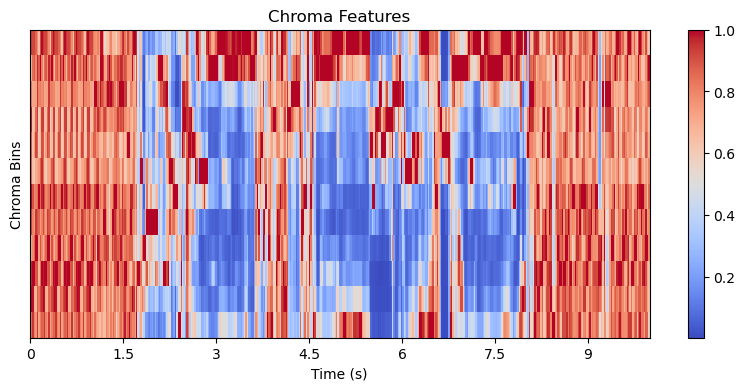

Zero Crossing Rate (Mean): 0.1301988924738979


In [86]:
# Compute Chroma Features
chroma = librosa.feature.chroma_stft(y=y_1, sr=sr_1)

# Compute Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y)

# Plot Chroma Features
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis="time", cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.xlabel("Time (s)")
plt.ylabel("Chroma Bins")
plt.show()

# Print Zero Crossing Rate
print(f"Zero Crossing Rate (Mean): {np.mean(zcr)}")


In [87]:
# Function to extract Chroma & ZCR features
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=22050)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)  # Average over time
    zcr = librosa.feature.zero_crossing_rate(y).mean()
    return chroma, zcr

# Load two audio samples
chroma1, zcr1 = extract_features("recorded_audio.wav")
chroma2, zcr2 = extract_features("recorded_audio_2.wav")

# Compute Cosine Similarity
chroma_similarity = 1 - cosine(chroma1, chroma2)
zcr_similarity = 1 - abs(zcr1 - zcr2)  # Direct comparison

print(f"🔹 Chroma Similarity: {chroma_similarity:.4f}")
print(f"🔹 Zero Crossing Rate Similarity: {zcr_similarity:.4f}")


🔹 Chroma Similarity: 0.9949
🔹 Zero Crossing Rate Similarity: 0.9573


In [88]:
chroma1

array([0.5202019 , 0.45485783, 0.47815165, 0.45923227, 0.44791663,
       0.49305725, 0.5214136 , 0.5079835 , 0.49078682, 0.51843715,
       0.704852  , 0.72928244], dtype=float32)

In [89]:
zcr1

0.30861861617476855

Now recording an ai voice

In [90]:
# Initialize PyAudio
p = pyaudio.PyAudio()

print("🎤 Recording... Speak now!")
stream = p.open(format=format, channels=channels, rate=sample_rate, input=True, frames_per_buffer=chunk)

frames = []
for _ in range(0, int(sample_rate / chunk * record_seconds)):
    data = stream.read(chunk)
    frames.append(data)

print("✅ Recording finished!")

# Stop and close stream
stream.stop_stream()
stream.close()
p.terminate()

# Save the audio
wf = wave.open("recorded_audio_ai.wav", "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(format))
wf.setframerate(sample_rate)
wf.writeframes(b''.join(frames))
wf.close()

print("🎵 Audio saved as 'recorded_audio_ai.wav'")


🎤 Recording... Speak now!
✅ Recording finished!
🎵 Audio saved as 'recorded_audio_ai.wav'


In [92]:
ipd.Audio("recorded_audio_ai.wav")

In [94]:
y_3 , sr_3 = librosa.load("recorded_audio_ai.wav", sr = None )
mfcc_3 = librosa.feature.mfcc(y= y_3 , sr = sr_3 , n_mfcc = 40)

chroma2, zcr2 = extract_features("recorded_audio_ai.wav")

In [98]:
def extract_features(audio_file, n_mfcc=40):
    y, sr = librosa.load(audio_file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).mean(axis=1)  # Average MFCCs
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)  # Average Chroma
    zcr = librosa.feature.zero_crossing_rate(y).mean()  # Mean ZCR
    return mfcc, chroma, zcr



In [3]:
# Function to extract MFCCs, Chroma, and ZCR
def extract_features(audio_file, n_mfcc=40):
    y, sr = librosa.load(audio_file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).mean(axis=1)  # Average MFCCs
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)  # Average Chroma
    zcr = librosa.feature.zero_crossing_rate(y).mean()  # Mean ZCR
    return mfcc, chroma, zcr

# Extract Features for All Three Audios
mfcc_1, chroma_1, zcr_1 = extract_features("recorded_audio.wav")
mfcc_2, chroma_2, zcr_2 = extract_features("recorded_audio_2.wav")
mfcc_3, chroma_3, zcr_3 = extract_features("recorded_audio_ai.wav")

# Function to Compute Similarity Metrics
def compute_similarity(feature1, feature2):
    return {
        "Euclidean": euclidean(feature1, feature2),
        "Cosine Similarity": 1 - cosine(feature1, feature2)
    }

# Compute MFCC Similarities
mfcc_sim_1_2 = compute_similarity(mfcc_1, mfcc_2)
mfcc_sim_1_3 = compute_similarity(mfcc_1, mfcc_3)
mfcc_sim_2_3 = compute_similarity(mfcc_2, mfcc_3)

# Compute Chroma Similarities
chroma_sim_1_2 = compute_similarity(chroma_1, chroma_2)
chroma_sim_1_3 = compute_similarity(chroma_1, chroma_3)
chroma_sim_2_3 = compute_similarity(chroma_2, chroma_3)

# Compute Zero Crossing Rate Similarities
zcr_sim_1_2 = 1 - abs(zcr_1 - zcr_2)
zcr_sim_1_3 = 1 - abs(zcr_1 - zcr_3)
zcr_sim_2_3 = 1 - abs(zcr_2 - zcr_3)

# Compute DTW Distance
D_1_2, _ = dtw(mfcc_1.reshape(1, -1), mfcc_2.reshape(1, -1), metric="euclidean")
D_1_3, _ = dtw(mfcc_1.reshape(1, -1), mfcc_3.reshape(1, -1), metric="euclidean")
D_2_3, _ = dtw(mfcc_2.reshape(1, -1), mfcc_3.reshape(1, -1), metric="euclidean")

# Print Results
print("\n🔹 **MFCC Similarities**")
print(f"Audio1 vs Audio2: {mfcc_sim_1_2}")
print(f"Audio1 vs Audio3: {mfcc_sim_1_3}")
print(f"Audio2 vs Audio3: {mfcc_sim_2_3}")

print("\n🔹 **Chroma Feature Similarities**")
print(f"Audio1 vs Audio2: {chroma_sim_1_2}")
print(f"Audio1 vs Audio3: {chroma_sim_1_3}")
print(f"Audio2 vs Audio3: {chroma_sim_2_3}")

print("\n🔹 **Zero Crossing Rate (ZCR) Similarities**")
print(f"Audio1 vs Audio2: {zcr_sim_1_2:.4f}")
print(f"Audio1 vs Audio3: {zcr_sim_1_3:.4f}")
print(f"Audio2 vs Audio3: {zcr_sim_2_3:.4f}")

print("\n🔹 **DTW Distances (Lower is Better)**")
print(f"Audio1 vs Audio2: {np.sum(D_1_2):.2f}")
print(f"Audio1 vs Audio3: {np.sum(D_1_3):.2f}")
print(f"Audio2 vs Audio3: {np.sum(D_2_3):.2f}")

C:\Users\shri\anaconda3\Lib\inspect.py:1007: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  if ismodule(module) and hasattr(module, '__file__'):



🔹 **MFCC Similarities**
Audio1 vs Audio2: {'Euclidean': 65.2038803100586, 'Cosine Similarity': 0.9992160549342061}
Audio1 vs Audio3: {'Euclidean': 122.79851531982422, 'Cosine Similarity': 0.9980217327219174}
Audio2 vs Audio3: {'Euclidean': 74.27440643310547, 'Cosine Similarity': 0.9980928802176171}

🔹 **Chroma Feature Similarities**
Audio1 vs Audio2: {'Euclidean': 0.2743770480155945, 'Cosine Similarity': 0.997232665741667}
Audio1 vs Audio3: {'Euclidean': 0.22678595781326294, 'Cosine Similarity': 0.9938869839342246}
Audio2 vs Audio3: {'Euclidean': 0.38163939118385315, 'Cosine Similarity': 0.992559087424755}

🔹 **Zero Crossing Rate (ZCR) Similarities**
Audio1 vs Audio2: 0.9969
Audio1 vs Audio3: 0.9841
Audio2 vs Audio3: 0.9809

🔹 **DTW Distances (Lower is Better)**
Audio1 vs Audio2: 1524760.14
Audio1 vs Audio3: 1682289.15
Audio2 vs Audio3: 1621644.79


In [4]:
# # Load pre-trained Speaker Verification model
model = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")

# Extract Speaker Embeddings
def extract_speaker_embedding(audio_file):
    signal, sr = torchaudio.load(audio_file)
    embedding = model.encode_batch(signal)
    return embedding.squeeze().detach().numpy()

# Extract embeddings for all three audios
embed_1 = extract_speaker_embedding("recorded_audio.wav")
embed_2 = extract_speaker_embedding("recorded_audio_2.wav")
embed_3 = extract_speaker_embedding("recorded_audio_ai.wav")

# Compare embeddings using Cosine Similarity
from scipy.spatial.distance import cosine
print(f"🔹 Cosine Similarity (Audio1 vs Audio2): {1 - cosine(embed_1, embed_2):.4f}")
print(f"🔹 Cosine Similarity (Audio1 vs AI-Generated): {1 - cosine(embed_1, embed_3):.4f}")


INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
C:\Users\shri\anaconda3\Lib\site-packages\speechbrain\utils\autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching

🔹 Cosine Similarity (Audio1 vs Audio2): 0.7686
🔹 Cosine Similarity (Audio1 vs AI-Generated): 0.5475


In [5]:
embed_1.size

192

In [6]:
euclidean_dist_1 = euclidean(embed_1, embed_2)
euclidean_dist_2 = euclidean(embed_1, embed_3)
euclidean_dist_3 = euclidean(embed_2, embed_3)


print("The euclidean distance between first and second audio is {}".format(euclidean_dist_1))
print("The euclidean distance between first and ai audio is {}".format(euclidean_dist_2))
print("The euclidean distance between secon and ai audio is {}".format(euclidean_dist_3))

The euclidean distance between first and second audio is 196.75674438476562
The euclidean distance between first and ai audio is 285.2655944824219
The euclidean distance between secon and ai audio is 293.0777282714844


In [38]:
# model

In [7]:
def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {100 * trainable_model_params / all_model_params:.2f}%"

print(print_number_of_trainable_model_parameters(model))

trainable model parameters: 0
all model parameters: 22150912
percentage of trainable model parameters: 0.00%


From here pretend to follow a proper flow.
1. Suppose I am a user and I want to register to the application

Below is the code to take 5 samples from the the user and save into a drectory

In [22]:

sample_list = ["tell us your name", "How are you feeling today",
  "What do you do","where do you live","How old are you"]

In [8]:

sample_list_2 = ["tell us your Password", "tell us your Password",
  "tell us your Password","tell us your Password","tell us your Password"]

In [10]:
# Set parameters
SAMPLE_RATE = 22050  # Sampling rate (22.05 kHz is standard for speech)
DURATION = 5  # Each recording lasts 3 seconds
USER_ID = "user_001"  # Replace with dynamic user ID if needed
SAVE_DIR = "user_audio_samples"  # Directory to store recordings

# Create directory if it doesn't exist
os.makedirs(SAVE_DIR, exist_ok=True)

# Function to record audio
def record_audio(filename, duration=3, samplerate=22050):
    print(f"🎤 Speak now... Recording for {duration} seconds.")
    audio_data = sd.rec(int(duration * samplerate), samplerate=samplerate, channels=1, dtype=np.int16)
    sd.wait()  # Wait until recording is finished

    # Save as WAV file
    with wave.open(filename, 'wb') as wf:
        wf.setnchannels(1)  # Mono channel
        wf.setsampwidth(2)  # 16-bit audio
        wf.setframerate(samplerate)
        wf.writeframes(audio_data.tobytes())

    print(f"✅ Saved: {filename}")

print("Answer the below questions the below sentences")
# Record 5 samples
for i in range(1, 6):
    print(sample_list_2[i-1])
    filename = os.path.join(SAVE_DIR, f"{USER_ID}_sample_{i}.wav")
    record_audio(filename, DURATION, SAMPLE_RATE)

print("🎉 Registration complete! 5 audio samples recorded successfully.")


Answer the below questions the below sentences
tell us your Password
🎤 Speak now... Recording for 5 seconds.
✅ Saved: user_audio_samples\user_001_sample_1.wav
tell us your Password
🎤 Speak now... Recording for 5 seconds.
✅ Saved: user_audio_samples\user_001_sample_2.wav
tell us your Password
🎤 Speak now... Recording for 5 seconds.
✅ Saved: user_audio_samples\user_001_sample_3.wav
tell us your Password
🎤 Speak now... Recording for 5 seconds.
✅ Saved: user_audio_samples\user_001_sample_4.wav
tell us your Password
🎤 Speak now... Recording for 5 seconds.
✅ Saved: user_audio_samples\user_001_sample_5.wav
🎉 Registration complete! 5 audio samples recorded successfully.


Reading the audios from the directory

In [11]:
embeddings = []
for i in range(0,5):
    audio = os.path.join(SAVE_DIR,f"{USER_ID}_sample_{i+1}.wav")
    audio_embedding = extract_speaker_embedding(audio)
    embeddings.append(audio_embedding)

In [12]:
cosine_similarity = 0
for i in range(0,5):
    for j in range(1,5):
        if(i<j):
            cosine_similarity += (1 - cosine(embeddings[i],embeddings[j] ))
            print(f"🔹 Cosine Similarity (Audio1 vs Audio2): {1 - cosine(embeddings[i],embeddings[j] ):.4f}")
print(f"🔹Mean Cosine Similarity of all audio sampels: { cosine_similarity/10 :.4f}")    

🔹 Cosine Similarity (Audio1 vs Audio2): 0.8578
🔹 Cosine Similarity (Audio1 vs Audio2): 0.8827
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7471
🔹 Cosine Similarity (Audio1 vs Audio2): 0.8697
🔹 Cosine Similarity (Audio1 vs Audio2): 0.8217
🔹 Cosine Similarity (Audio1 vs Audio2): 0.8228
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7742
🔹 Cosine Similarity (Audio1 vs Audio2): 0.8180
🔹 Cosine Similarity (Audio1 vs Audio2): 0.8155
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7342
🔹Mean Cosine Similarity of all audio sampels: 0.8144


In [13]:
mean_euclidean = 0
for i in range(0,5):
    for j in range(1,5):
        if(i<j):
            mean_euclidean += euclidean(embeddings[i],embeddings[j] )
            print(f"🔹 Euclidean Distance between (Audio1 vs Audio2): {euclidean(embeddings[i],embeddings[j] ):.4f}")
print(f"🔹Mean CEuclidean Distance of all audio sampels: { mean_euclidean/10 :.4f}")  

🔹 Euclidean Distance between (Audio1 vs Audio2): 180.1470
🔹 Euclidean Distance between (Audio1 vs Audio2): 164.5845
🔹 Euclidean Distance between (Audio1 vs Audio2): 243.3286
🔹 Euclidean Distance between (Audio1 vs Audio2): 171.9763
🔹 Euclidean Distance between (Audio1 vs Audio2): 194.4307
🔹 Euclidean Distance between (Audio1 vs Audio2): 196.7573
🔹 Euclidean Distance between (Audio1 vs Audio2): 207.7180
🔹 Euclidean Distance between (Audio1 vs Audio2): 200.6746
🔹 Euclidean Distance between (Audio1 vs Audio2): 190.8875
🔹 Euclidean Distance between (Audio1 vs Audio2): 232.0332
🔹Mean CEuclidean Distance of all audio sampels: 198.2538


for login take input from the user with below code

In [19]:
# Function to record audio in memory
def record_audio(duration=5, samplerate=22050):
    print(f"🎤 Speak now... Recording for {duration} seconds.")
    audio_data = sd.rec(int(duration * samplerate), samplerate=samplerate, channels=1, dtype=np.int16)
    sd.wait()

    # Convert to bytes (simulate in-memory WAV file)
    wav_buffer = io.BytesIO()
    with wave.open(wav_buffer, 'wb') as wf:
        wf.setnchannels(1)
        wf.setsampwidth(2)
        wf.setframerate(samplerate)
        wf.writeframes(audio_data.tobytes())

    wav_buffer.seek(0)  # Reset buffer position
    return wav_buffer

# Function to extract speaker embedding from in-memory audio
def extract_embedding_from_memory(audio_buffer):
    # Load from buffer instead of file
    with wave.open(audio_buffer, 'rb') as wf:
        sr = wf.getframerate()
        frames = wf.readframes(wf.getnframes())
        waveform = torch.tensor(np.frombuffer(frames, dtype=np.int16), dtype=torch.float32)
        waveform = waveform / 32768.0  # Normalize audio

    # Convert waveform to the correct format
    waveform = waveform.unsqueeze(0)  # Add batch dimension
    embedding = model.encode_batch(waveform)
    return embedding.squeeze().detach().numpy()

# # Load stored user embeddings
# with open("user_embeddings.json", "r") as f:
#     user_database = json.load(f)

# Step 1: Record login attempt (In-Memory)
audio_buffer = record_audio()

🎤 Speak now... Recording for 5 seconds.


In [20]:
audio_buffer

In [21]:
def extract_embedding_from_memory(audio_buffer):
    # Load from buffer instead of file
    with wave.open(audio_buffer, 'rb') as wf:
        sr = wf.getframerate()
        frames = wf.readframes(wf.getnframes())
        waveform = torch.tensor(np.frombuffer(frames, dtype=np.int16), dtype=torch.float32)
        waveform = waveform / 32768.0  # Normalize audio

    # Convert waveform to the correct format
    waveform = waveform.unsqueeze(0)  # Add batch dimension
    embedding = model.encode_batch(waveform)
    return embedding.squeeze().detach().numpy()


# Step 2: Extract embedding from in-memory login audio
login_embedding = extract_embedding_from_memory(audio_buffer)

In [22]:
login_embedding.shape

(192,)

In [23]:
for i in range(0,5):
    print(f"🔹 Euclidean Distance between (Audio1 vs Audio2): {euclidean(embeddings[i],login_embedding ):.4f}")
# print(f"🔹Mean CEuclidean Distance of all audio sampels: { mean_euclidean/10 :.4f}")  

🔹 Euclidean Distance between (Audio1 vs Audio2): 231.8384
🔹 Euclidean Distance between (Audio1 vs Audio2): 219.6870
🔹 Euclidean Distance between (Audio1 vs Audio2): 214.4444
🔹 Euclidean Distance between (Audio1 vs Audio2): 251.2193
🔹 Euclidean Distance between (Audio1 vs Audio2): 239.2570


In [34]:
for i in range(0,5):
    print(f"🔹 Cosine Similarity (Audio1 vs Audio2): {1 - cosine(login_embedding,embeddings[i] ):.4f}")
# print(f"🔹Mean CEuclidean Distance of all audio sampels: { mean_euclidean/10 :.4f}")  

🔹 Cosine Similarity (Audio1 vs Audio2): 0.7664
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7734
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7873
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7158
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7071


In [32]:
ipd.Audio("user_audio_samples\\user_001_sample_5.wav")

In [33]:
from IPython.display import Audio

# Reset buffer position before playback
audio_buffer.seek(0)

# Play audio directly in Jupyter Notebook
Audio(audio_buffer.read(), rate=22050)  # Use the correct sample rate


In [49]:
# embeddings

In [38]:
len(embeddings[0])

192

In [41]:
embeddings_array = np.array(embeddings)
embeddings_array.shape

(5, 192)

Visualising the mean and the variance of all the samples of a single user

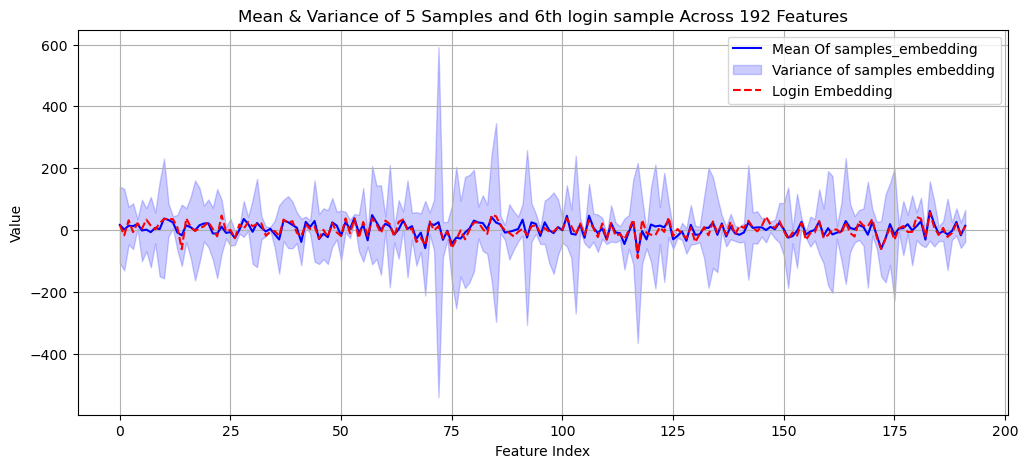

In [48]:
# Compute Mean and Variance Across Samples (Rows)
mean_values = np.mean(embeddings_array, axis=0)  # Shape: (192,)
variance_values = np.var(embeddings_array, axis=0)  # Shape: (192,)

# Create Plot
plt.figure(figsize=(12, 5))
plt.plot(mean_values, label="Mean Of samples_embedding", color="blue")
plt.fill_between(range(192), mean_values - variance_values, mean_values + variance_values, 
                 color='blue', alpha=0.2, label="Variance of samples embedding")
plt.plot(login_embedding, label="Login Embedding", color="red", linestyle="dashed")

# Labels & Title
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.title("Mean & Variance of 5 Samples and 6th login sample Across 192 Features")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()

In [47]:
print(f"🔹 Euclidean Distance between (login embedding and vs mean embedding of all the samples): {euclidean(mean_values,login_embedding ):.4f}")
print(f"🔹 Cosine Similarity (login embedding and vs mean embedding of all the samples): {1 - cosine(login_embedding,mean_values ):.4f}")

🔹 Euclidean Distance between (login embedding and vs mean embedding of all the samples): 194.2398
🔹 Cosine Similarity (login embedding and vs mean embedding of all the samples): 0.8134


### For better comparison let us once check the MFCC feature comparison also.

let us extract mfcc features of the 5 samples.

In [52]:
mfcc_embeddings = []
for i in range(0,5):
    audio = os.path.join(SAVE_DIR,f"{USER_ID}_sample_{i+1}.wav")
    y, sr = librosa.load(audio, sr=22050)  # y = audio signal, sr = sample rate
    audio_embedding = librosa.feature.mfcc(y = y , sr = sr)
    mfcc_embeddings.append(audio_embedding)

In [61]:
mfcc_array = np.array(mfcc_embeddings)
mfcc_array.shape

(5, 20, 216)

As the shape of the mfcc features for a single voice sample is (20,216) where each row represents a different characteristics. We should find how to compare two audio signals using mfcc

1. The first method is to take the mean along all the 216 columns and get a (1,216) vector for each sampel and then compare. But this method is very lossy. We will loose all the information. But lets try once.

In [105]:
def calculate_mean_mfcc_similarities(mfcc_array):
    mean_distance = []
    for i in range(0,5):
        for j in range(0,5):
            if(i<j):
                mean_i = np.mean(mfcc_array[i,:,:],axis = 1)
                mean_j = np.mean(mfcc_array[j,:,:],axis = 1)
                print(f"🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): {euclidean(mean_i,mean_j):.4f}")
                print(f"🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): {1 - cosine(mean_i,mean_j):.4f}")
                euc = euclidean(mean_i,mean_j)
                mean_distance.append(euc)
    return mean_distance

                

In [106]:
mean_distance = calculate_mean_mfcc_similarities(mfcc_array)

🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 23.0302
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9999
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 18.5304
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 1.0000
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 40.5306
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9999
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 29.7777
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9999
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 9.2793
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9999
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 22.1225
🔹 Cosi

In [107]:
mean_distance

[23.03023910522461,
 18.530420303344727,
 40.53059387207031,
 29.777706146240234,
 9.279338836669922,
 22.122507095336914,
 13.137463569641113,
 23.969079971313477,
 15.077675819396973,
 13.486186981201172]

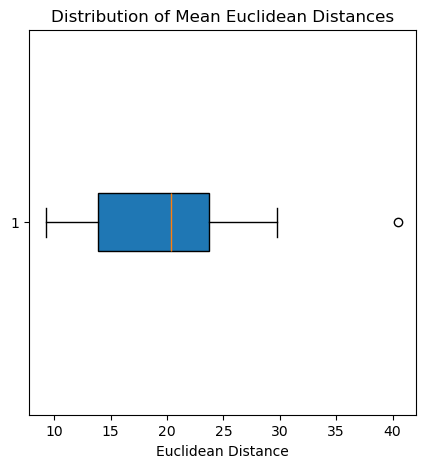

In [108]:
plt.figure(figsize=(5, 5))
plt.boxplot(mean_distance, vert=False, patch_artist=True)

# Labels & Title
plt.xlabel("Euclidean Distance")
plt.title("Distribution of Mean Euclidean Distances")

# Show Plot
plt.show()

COsine similarity is close to one for all the mfcc mean embeddings but distance varies a lot from 57 to 111

2. Second method for similarity comparison is to use DTW (dynamic time wrapping technique) which compared all (20,216) order values at once and gives a distance score

In [76]:
def calculate_dtw_mfcc_similarities(mfcc_array):
    for i in range(0,5):
        for j in range(0,5):
            if(i<j):
                distance, _ = fastdtw(mfcc_array[i,:,:].T, mfcc_array[j,:,:].T)  # (216, 20) after transpose
                print(f"🔹 DTW Distance (MFCC Matrix Comparison): {distance:.4f}")
                

In [77]:
calculate_dtw_mfcc_similarities(mfcc_array)

🔹 DTW Distance (MFCC Matrix Comparison): 30730.3588
🔹 DTW Distance (MFCC Matrix Comparison): 23020.9681
🔹 DTW Distance (MFCC Matrix Comparison): 34613.1591
🔹 DTW Distance (MFCC Matrix Comparison): 30730.5749
🔹 DTW Distance (MFCC Matrix Comparison): 25421.1157
🔹 DTW Distance (MFCC Matrix Comparison): 30415.7578
🔹 DTW Distance (MFCC Matrix Comparison): 26214.0644
🔹 DTW Distance (MFCC Matrix Comparison): 30428.5379
🔹 DTW Distance (MFCC Matrix Comparison): 29385.7793
🔹 DTW Distance (MFCC Matrix Comparison): 23289.8218


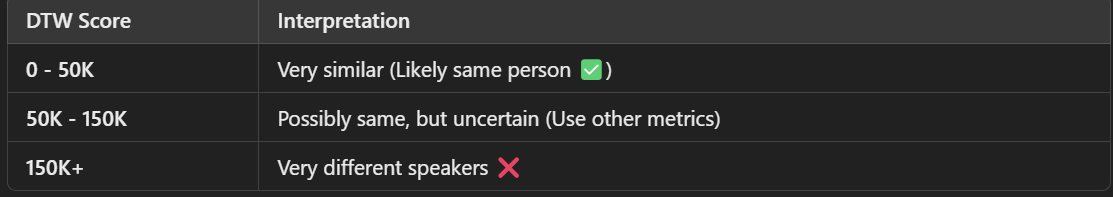

3. Third method for comparison is to take the mean and variance of all (20,216) cofficients along axis 1 and concatenate them for 40 dimentinal vector for each sample

In [99]:
def calculate_mean_andvariance_mfcc_similarities(mfcc_array):
    mean_euclidean_distance = []
    for i in range(0,5):
        for j in range(0,5):
            if(i<j):
                mean_i = np.mean(mfcc_array[i,:,:], axis=1)  # Shape (13,)
                std_i= np.std(mfcc_array[i,:,:], axis=1)
                embedding_i = np.concatenate([mean_i, std_i])

                mean_j = np.mean(mfcc_array[j,:,:], axis=1)  # Shape (13,)
                std_j = np.std(mfcc_array[j,:,:], axis=1)
                embedding_j = np.concatenate([mean_j, std_j])

                # Compute Similarity Scores
                cosine_sim = 1 - cosine(embedding_i, embedding_j)
                euclidean_dist = euclidean(embedding_i, embedding_j)
                mean_euclidean_distance.append(euclidean_dist)

                print(f"🔹 Cosine Similarity: {cosine_sim:.4f}")
                print(f"🔹 Euclidean Distance: {euclidean_dist:.4f}")
    return mean_euclidean_distance
                
                

In [100]:
mean_euclidean_distance = calculate_mean_andvariance_mfcc_similarities(mfcc_array)

🔹 Cosine Similarity: 0.9997
🔹 Euclidean Distance: 30.4173
🔹 Cosine Similarity: 0.9999
🔹 Euclidean Distance: 20.7046
🔹 Cosine Similarity: 0.9998
🔹 Euclidean Distance: 45.1533
🔹 Cosine Similarity: 0.9993
🔹 Euclidean Distance: 45.4015
🔹 Cosine Similarity: 0.9998
🔹 Euclidean Distance: 17.8771
🔹 Cosine Similarity: 0.9998
🔹 Euclidean Distance: 24.0604
🔹 Cosine Similarity: 0.9996
🔹 Euclidean Distance: 24.5037
🔹 Cosine Similarity: 0.9998
🔹 Euclidean Distance: 29.0396
🔹 Cosine Similarity: 0.9993
🔹 Euclidean Distance: 33.9040
🔹 Cosine Similarity: 0.9995
🔹 Euclidean Distance: 25.1268


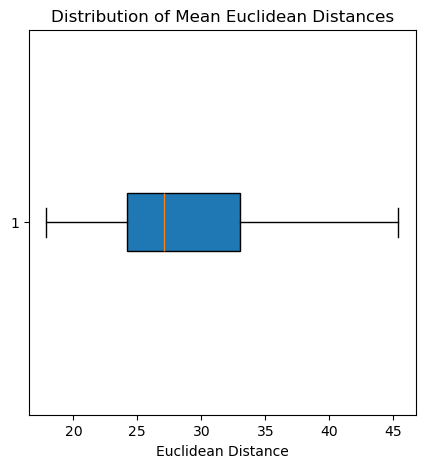

In [101]:
plt.figure(figsize=(5, 5))
plt.boxplot(mean_euclidean_distance, vert=False, patch_artist=True)

# Labels & Title
plt.xlabel("Euclidean Distance")
plt.title("Distribution of Mean Euclidean Distances")

# Show Plot
plt.show()


These were the analysis for the single user(shri) with same text. Now lets see the same matrices for different users with same texts.

This is feature extraction from TDNN model

For user 2

In [112]:
SAVE_DIR = os.path.join(SAVE_DIR,"user_2")

In [113]:
SAVE_DIR

'user_audio_samples\\user_2'

In [153]:
embeddings = []
for i in range(0,4):
    audio = os.path.join(SAVE_DIR,f"{USER_ID}sample{i+1}.wav")
    audio_embedding = extract_speaker_embedding(audio)
    embeddings.append(audio_embedding)

cosine_similarity = 0
for i in range(0,4):
    for j in range(1,4):
        if(i<j):
            cosine_similarity += (1 - cosine(embeddings[i],embeddings[j] ))
            print(f"🔹 Cosine Similarity (Audio1 vs Audio2): {1 - cosine(embeddings[i],embeddings[j] ):.4f}")
print(f"🔹Mean Cosine Similarity of all audio sampels: { cosine_similarity/6 :.4f}")    

🔹 Cosine Similarity (Audio1 vs Audio2): 0.7467
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7427
🔹 Cosine Similarity (Audio1 vs Audio2): 0.6428
🔹 Cosine Similarity (Audio1 vs Audio2): 0.8460
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7165
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7475
🔹Mean Cosine Similarity of all audio sampels: 0.7404


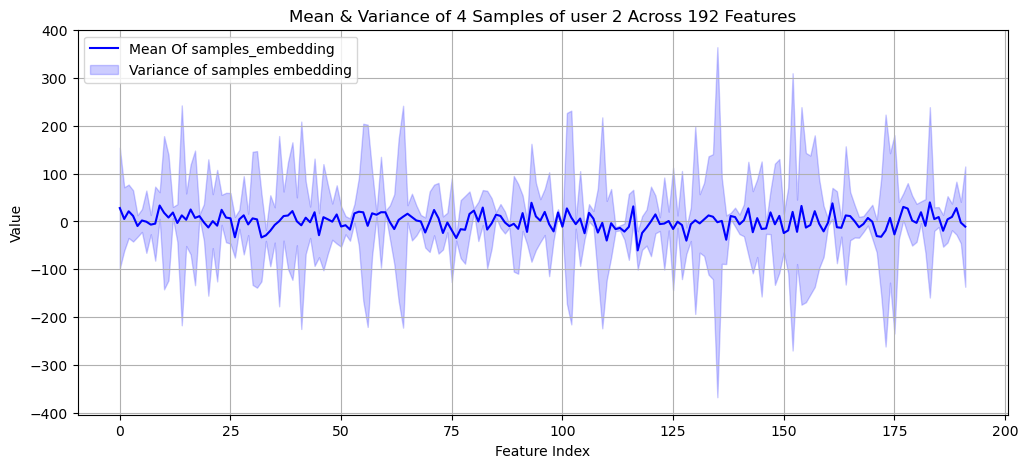

In [156]:
embeddings_array = np.array(embeddings)
# Compute Mean and Variance Across Samples (Rows)
mean_values = np.mean(embeddings_array, axis=0)  # Shape: (192,)
variance_values = np.var(embeddings_array, axis=0)  # Shape: (192,)


# Create Plot
plt.figure(figsize=(12, 5))
plt.plot(mean_values, label="Mean Of samples_embedding", color="blue")
plt.fill_between(range(192), mean_values - variance_values, mean_values + variance_values, 
                 color='blue', alpha=0.2, label="Variance of samples embedding")
# plt.plot(login_embedding, label="Login Embedding", color="red", linestyle="dashed")

# Labels & Title
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.title("Mean & Variance of 4 Samples of user 2 Across 192 Features")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()

In [118]:
mean_euclidean = 0
for i in range(0,4):
    for j in range(1,4):
        if(i<j):
            mean_euclidean += euclidean(embeddings[i],embeddings[j] )
            print(f"🔹 Euclidean Distance between (Audio1 vs Audio2): {euclidean(embeddings[i],embeddings[j] ):.4f}")
print(f"🔹Mean CEuclidean Distance of all audio sampels: { mean_euclidean/6 :.4f}")  

🔹 Euclidean Distance between (Audio1 vs Audio2): 189.6555
🔹 Euclidean Distance between (Audio1 vs Audio2): 190.5419
🔹 Euclidean Distance between (Audio1 vs Audio2): 229.2821
🔹 Euclidean Distance between (Audio1 vs Audio2): 144.9090
🔹 Euclidean Distance between (Audio1 vs Audio2): 201.2671
🔹 Euclidean Distance between (Audio1 vs Audio2): 189.4020
🔹Mean CEuclidean Distance of all audio sampels: 190.8429


For user 3

In [158]:
USER_ID = "user_002"
SAVE_DIR = "user_audio_samples"
SAVE_DIR = os.path.join(SAVE_DIR,"User_3")

In [159]:
embeddings = []
for i in range(0,4):
    audio = os.path.join(SAVE_DIR,f"{USER_ID}sample{i+1}.wav")
    audio_embedding = extract_speaker_embedding(audio)
    embeddings.append(audio_embedding)

cosine_similarity = 0
for i in range(0,4):
    for j in range(1,4):
        if(i<j):
            cosine_similarity += (1 - cosine(embeddings[i],embeddings[j] ))
            print(f"🔹 Cosine Similarity (Audio1 vs Audio2): {1 - cosine(embeddings[i],embeddings[j] ):.4f}")
print(f"🔹Mean Cosine Similarity of all audio sampels: { cosine_similarity/6 :.4f}")  

🔹 Cosine Similarity (Audio1 vs Audio2): 0.7526
🔹 Cosine Similarity (Audio1 vs Audio2): 0.6649
🔹 Cosine Similarity (Audio1 vs Audio2): 0.6458
🔹 Cosine Similarity (Audio1 vs Audio2): 0.5911
🔹 Cosine Similarity (Audio1 vs Audio2): 0.5388
🔹 Cosine Similarity (Audio1 vs Audio2): 0.7092
🔹Mean Cosine Similarity of all audio sampels: 0.6504


In [160]:
mean_euclidean = 0
for i in range(0,4):
    for j in range(1,4):
        if(i<j):
            mean_euclidean += euclidean(embeddings[i],embeddings[j] )
            print(f"🔹 Euclidean Distance between (Audio1 vs Audio2): {euclidean(embeddings[i],embeddings[j] ):.4f}")
print(f"🔹Mean CEuclidean Distance of all audio sampels: { mean_euclidean/6 :.4f}")  

🔹 Euclidean Distance between (Audio1 vs Audio2): 218.1979
🔹 Euclidean Distance between (Audio1 vs Audio2): 251.4947
🔹 Euclidean Distance between (Audio1 vs Audio2): 271.1773
🔹 Euclidean Distance between (Audio1 vs Audio2): 262.7458
🔹 Euclidean Distance between (Audio1 vs Audio2): 296.8105
🔹 Euclidean Distance between (Audio1 vs Audio2): 234.7423
🔹Mean CEuclidean Distance of all audio sampels: 255.8614


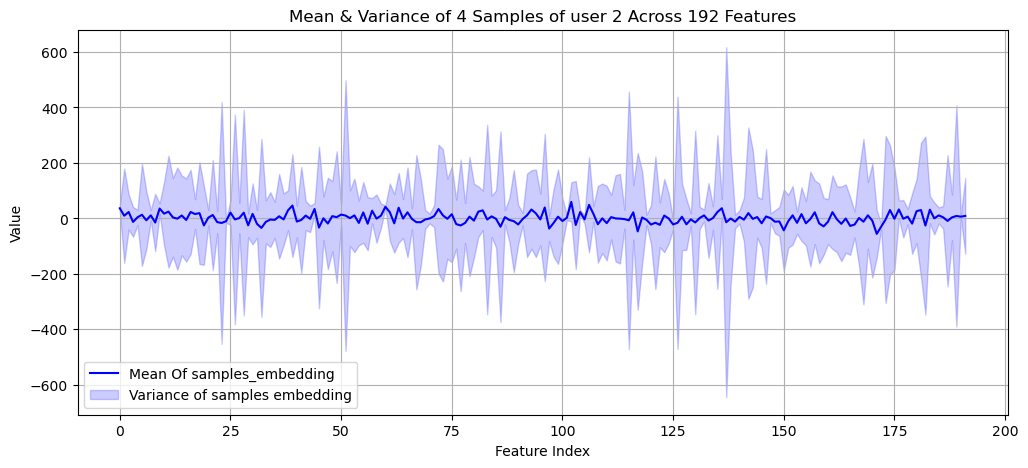

In [161]:
embeddings_array = np.array(embeddings)
# Compute Mean and Variance Across Samples (Rows)
mean_values = np.mean(embeddings_array, axis=0)  # Shape: (192,)
variance_values = np.var(embeddings_array, axis=0)  # Shape: (192,)


# Create Plot
plt.figure(figsize=(12, 5))
plt.plot(mean_values, label="Mean Of samples_embedding", color="blue")
plt.fill_between(range(192), mean_values - variance_values, mean_values + variance_values, 
                 color='blue', alpha=0.2, label="Variance of samples embedding")
# plt.plot(login_embedding, label="Login Embedding", color="red", linestyle="dashed")

# Labels & Title
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.title("Mean & Variance of 4 Samples of user 2 Across 192 Features")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()

Now MFCC with only mean around axis 1

For user 2

In [151]:
USER_ID = "user_001"
SAVE_DIR = "user_audio_samples"
SAVE_DIR = os.path.join(SAVE_DIR,"User_2")

In [152]:
mfcc_embeddings = []
for i in range(0,4):
    audio = os.path.join(SAVE_DIR,f"{USER_ID}sample{i+1}.wav")
    y, sr = librosa.load(audio, sr=22050)  # y = audio signal, sr = sample rate
    audio_embedding = librosa.feature.mfcc(y = y , sr = sr)
    mfcc_embeddings.append(audio_embedding)
mfcc_array = np.array(mfcc_embeddings)
mfcc_array.shape

(4, 20, 216)

In [135]:
def calculate_mean_mfcc_similarities(mfcc_array):
    mean_distance = []
    for i in range(0,4):
        for j in range(0,4):
            if(i<j):
                mean_i = np.mean(mfcc_array[i,:,:],axis = 1)
                mean_j = np.mean(mfcc_array[j,:,:],axis = 1)
                print(f"🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): {euclidean(mean_i,mean_j):.4f}")
                print(f"🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): {1 - cosine(mean_i,mean_j):.4f}")
                euc = euclidean(mean_i,mean_j)
                mean_distance.append(euc)
    return mean_distance

mean_distance = calculate_mean_mfcc_similarities(mfcc_array)       

🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 11.8696
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9997
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 24.7367
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9989
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 21.4099
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9994
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 24.7509
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9993
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 25.0012
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9994
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 22.1070
🔹 Cos

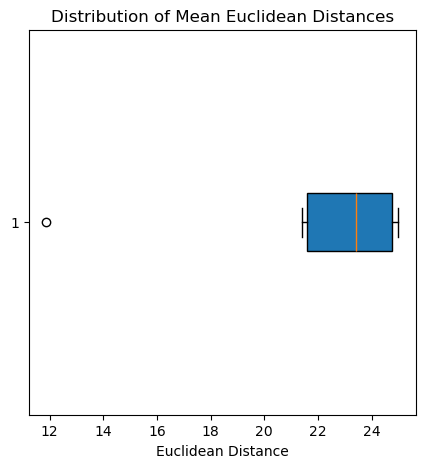

In [136]:
plt.figure(figsize=(5, 5))
plt.boxplot(mean_distance, vert=False, patch_artist=True)

# Labels & Title
plt.xlabel("Euclidean Distance")
plt.title("Distribution of Mean Euclidean Distances")

# Show Plot
plt.show()

Let's calculate dtw for the second user

In [138]:
def calculate_dtw_mfcc_similarities(mfcc_array):
    for i in range(0,4):
        for j in range(0,4):
            if(i<j):
                distance, _ = fastdtw(mfcc_array[i,:,:].T, mfcc_array[j,:,:].T)  # (216, 20) after transpose
                print(f"🔹 DTW Distance (MFCC Matrix Comparison): {distance:.4f}")

calculate_dtw_mfcc_similarities(mfcc_array)

🔹 DTW Distance (MFCC Matrix Comparison): 38418.1857
🔹 DTW Distance (MFCC Matrix Comparison): 48589.3505
🔹 DTW Distance (MFCC Matrix Comparison): 44900.2222
🔹 DTW Distance (MFCC Matrix Comparison): 51609.9638
🔹 DTW Distance (MFCC Matrix Comparison): 46436.0559
🔹 DTW Distance (MFCC Matrix Comparison): 57696.4994


Third method mean plus variance

In [141]:
def calculate_mean_andvariance_mfcc_similarities(mfcc_array):
    mean_euclidean_distance = []
    for i in range(0,4):
        for j in range(0,4):
            if(i<j):
                mean_i = np.mean(mfcc_array[i,:,:], axis=1)  # Shape (13,)
                std_i= np.std(mfcc_array[i,:,:], axis=1)
                embedding_i = np.concatenate([mean_i, std_i])

                mean_j = np.mean(mfcc_array[j,:,:], axis=1)  # Shape (13,)
                std_j = np.std(mfcc_array[j,:,:], axis=1)
                embedding_j = np.concatenate([mean_j, std_j])

                # Compute Similarity Scores
                cosine_sim = 1 - cosine(embedding_i, embedding_j)
                euclidean_dist = euclidean(embedding_i, embedding_j)
                mean_euclidean_distance.append(euclidean_dist)

                print(f"🔹 Cosine Similarity: {cosine_sim:.4f}")
                print(f"🔹 Euclidean Distance: {euclidean_dist:.4f}")
    return mean_euclidean_distance
                
mean_euclidean_distance = calculate_mean_andvariance_mfcc_similarities(mfcc_array)

🔹 Cosine Similarity: 0.9994
🔹 Euclidean Distance: 18.0722
🔹 Cosine Similarity: 0.9985
🔹 Euclidean Distance: 28.8478
🔹 Cosine Similarity: 0.9992
🔹 Euclidean Distance: 25.3283
🔹 Cosine Similarity: 0.9984
🔹 Euclidean Distance: 30.1437
🔹 Cosine Similarity: 0.9993
🔹 Euclidean Distance: 25.8536
🔹 Cosine Similarity: 0.9984
🔹 Euclidean Distance: 28.5464


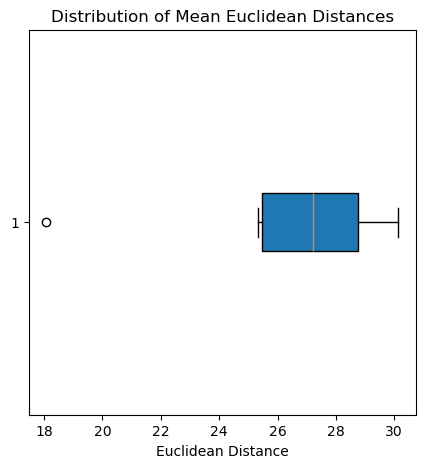

In [142]:
plt.figure(figsize=(5, 5))
plt.boxplot(mean_euclidean_distance, vert=False, patch_artist=True)

# Labels & Title
plt.xlabel("Euclidean Distance")
plt.title("Distribution of Mean Euclidean Distances")

# Show Plot
plt.show()

For user 3

In [144]:
USER_ID = "user_002"
SAVE_DIR = "user_audio_samples"
SAVE_DIR = os.path.join(SAVE_DIR,"User_3")

In [145]:
mfcc_embeddings = []
for i in range(0,4):
    audio = os.path.join(SAVE_DIR,f"{USER_ID}sample{i+1}.wav")
    y, sr = librosa.load(audio, sr=22050)  # y = audio signal, sr = sample rate
    audio_embedding = librosa.feature.mfcc(y = y , sr = sr)
    mfcc_embeddings.append(audio_embedding)
mfcc_array = np.array(mfcc_embeddings)
mfcc_array.shape

(4, 20, 216)

In [146]:
mean_distance = calculate_mean_mfcc_similarities(mfcc_array)  

🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 34.2762
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9979
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 60.5210
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9953
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 45.1982
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9990
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 31.2501
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9988
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 28.8123
🔹 Cosine Similarity (ith mfcc mean embedding and vs ith mfcc mean embedding): 0.9986
🔹 Euclidean Distance between (ith mfcc mean embedding and vs ith mfcc mean embedding): 31.7283
🔹 Cos

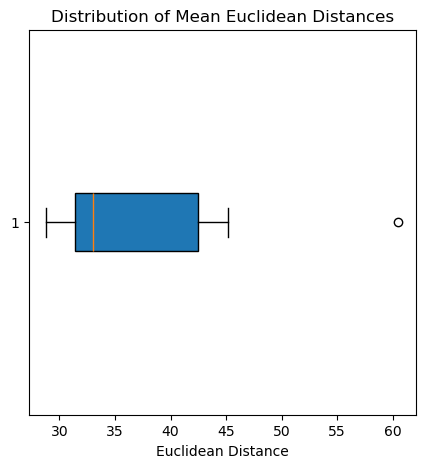

In [147]:
plt.figure(figsize=(5, 5))
plt.boxplot(mean_distance, vert=False, patch_artist=True)

# Labels & Title
plt.xlabel("Euclidean Distance")
plt.title("Distribution of Mean Euclidean Distances")

# Show Plot
plt.show()

In [148]:
calculate_dtw_mfcc_similarities(mfcc_array)

🔹 DTW Distance (MFCC Matrix Comparison): 67498.5806
🔹 DTW Distance (MFCC Matrix Comparison): 89520.6620
🔹 DTW Distance (MFCC Matrix Comparison): 88627.5345
🔹 DTW Distance (MFCC Matrix Comparison): 64192.1260
🔹 DTW Distance (MFCC Matrix Comparison): 71344.4927
🔹 DTW Distance (MFCC Matrix Comparison): 65235.8348


In [149]:
mean_euclidean_distance = calculate_mean_andvariance_mfcc_similarities(mfcc_array)

🔹 Cosine Similarity: 0.9974
🔹 Euclidean Distance: 41.5399
🔹 Cosine Similarity: 0.9956
🔹 Euclidean Distance: 64.1878
🔹 Cosine Similarity: 0.9987
🔹 Euclidean Distance: 46.2865
🔹 Cosine Similarity: 0.9985
🔹 Euclidean Distance: 33.1449
🔹 Cosine Similarity: 0.9973
🔹 Euclidean Distance: 35.9804
🔹 Cosine Similarity: 0.9972
🔹 Euclidean Distance: 35.5689


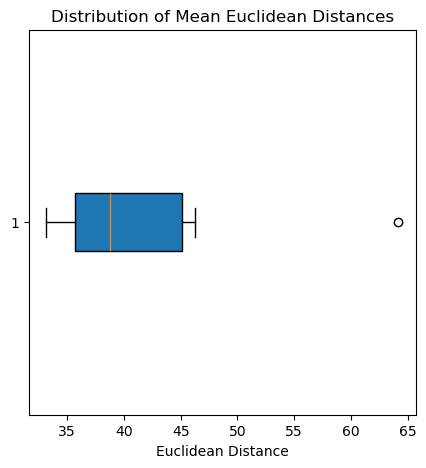

In [150]:
plt.figure(figsize=(5, 5))
plt.boxplot(mean_euclidean_distance, vert=False, patch_artist=True)

# Labels & Title
plt.xlabel("Euclidean Distance")
plt.title("Distribution of Mean Euclidean Distances")

# Show Plot
plt.show()

Conclusion:
* For user 1 
  * The   Mean Cosine Similarity of all 5 sampels: 0.8144 (Pretrained model)
  * Mean CEuclidean Distance of all 5 audio sampels: 198.2538 (Pretrained model)
  * Mean MFCC cofficien Distance of all 5 audio sampels: 21   (MFCC)
  * DTW values are less than 31000 which is good                 (MFCC)
  * mean_variance mean euclidean distance is 27 which is also good  (MFCC)

* For user 2
  * The   Mean Cosine Similarity of all 5 sampels: 0.74 (Pretrained model)
  * Mean CEuclidean Distance of all 5 audio sampels: 190.2538 (Pretrained model)
  * Mean MFCC cofficien Distance of all 5 audio sampels: 23   (MFCC)
  * DTW values are less than 58999   (not good)                      (MFCC)
  * mean_variance mean euclidean distance is 27 which is also good  (MFCC)

* For user 3
  * The   Mean Cosine Similarity of all 5 sampels: 0.65 (Pretrained model)
  * Mean CEuclidean Distance of all 5 audio sampels: 255.2538 (Pretrained model)
  * Mean MFCC cofficien Distance of all 5 audio sampels: 34   (MFCC)
  * DTW values are less than 89000 which is verybad                 (MFCC)
  * mean_variance mean euclidean distance is 39           (MFCC)

After listening to all the audios for user 1, 2 and 3. I found that user_1 voice samples do not contain audible noise, user 2 samples contains small amount of noise and user 3 samples contain much noise. During registration or login we need to preprocess the voice.Below are the steps.
* Record the registration audion
* perform fourier or wavelet transform to convert signal into frequency domain.
* choose a threshold to remove noises.
* reconstruct the audio signal
* then perform featurisation
* save to the database
* during login authentication do the same. 

C:\Users\shri\Data_Science\Aman's_Project\archive\vox1_indian\content\vox_indian\id10003\_JpHD6VnJ3I

Let's try something. Lets create a dataset by merging all the three users voice samples in the above exaples and add one sample of amir khans voice from the voice indian celebrities dataset. So that we have four samples in our dataset(csv file in our case). We will then take another amir khans voice from the same dataset imitating login and computer similarity with all the four voices. Lets see what are the results.

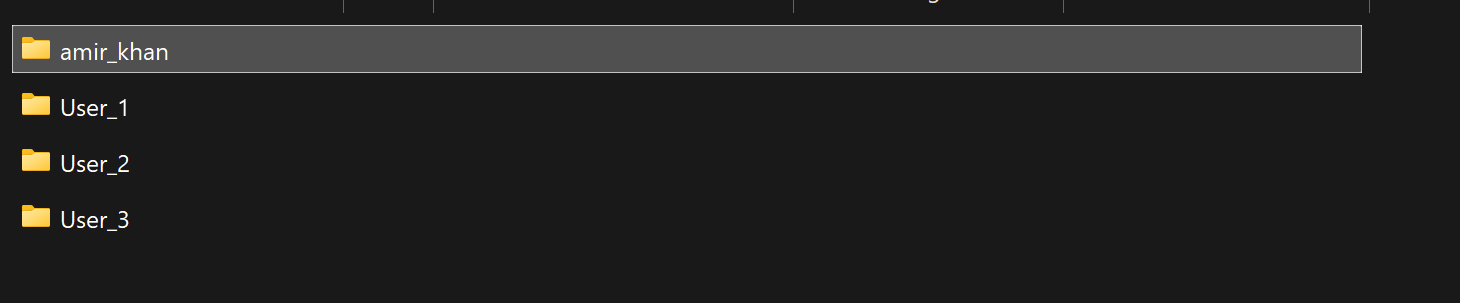
This is our dataset distribution.We are following below steps
* For user 1,2,3 extract features, as they have more than one samples extract features using pretrained model and take mean of all the features as a representation of each user. We are not performing preprocessing yet to simplify things.
* For amir khans(User_4) voice also as we have 5 samples we will compute the same means of feature and append to csv file.

First define a function to load the voice samples for all the users

Loading the model to extract the features

In [6]:
# # Load pre-trained Speaker Verification model
model = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
C:\Users\shri\anaconda3\Lib\site-packages\speechbrain\utils\autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching

defining function to extract features

In [177]:
# Extract Speaker Embeddings
def extract_speaker_embedding(audio_file):
    signal, sr = torchaudio.load(audio_file)
    embedding = model.encode_batch(signal)
    return embedding.squeeze().detach().numpy()


Below is the function for automatically calculating the mean tdnn features for all users irrespective of the number of samples any user have. This function can work for any number of usersa and any number of samples. The only disadvantage is the complexity of this function n*s where n is the number of user and s is the average number of samples per user. If this function works then we can optimise it a litte bit for lower complexity which we will see later.

In [215]:
user_audio_dir = os.path.join(os.getcwd(),"user_audio_samples")

def extract_mean_TDNN_features(user_audio_directory):
    user_features = []
    for user in os.listdir(user_audio_directory):
        particular_user_path = os.path.join(user_audio_directory, user)
        user_sample_features = []
        for samples in os.listdir(particular_user_path):
            sample_path = os.path.join(particular_user_path,samples)
            embedding = extract_speaker_embedding(sample_path)
            user_sample_features.append(embedding)
        user_samples_features_array = np.array(user_sample_features)
        # print(user_samples_features_array.shape)
        user_features.append(np.mean(user_samples_features_array , axis = 0))
    user_features = np.array(user_features)
    # print(user_features.shape)
    return user_features
        
    
user_tdnn_features = extract_mean_TDNN_features(user_audio_dir)

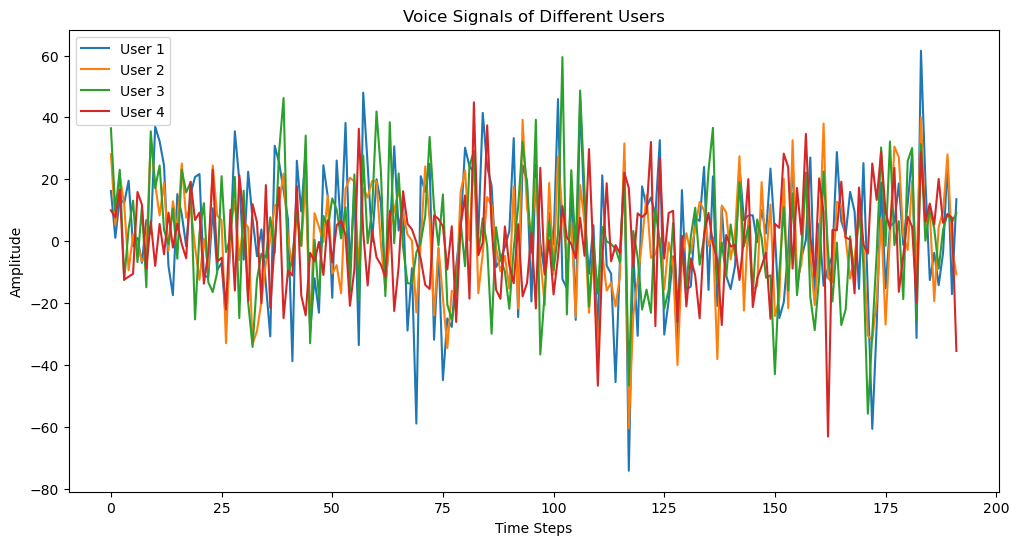

In [216]:
# let's visualise each user 
time = np.arange(192)
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.plot(time, user_tdnn_features[i], label=f"User {i+1}")

# Labels and title
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.title("Voice Signals of Different Users")
plt.legend()
plt.show()

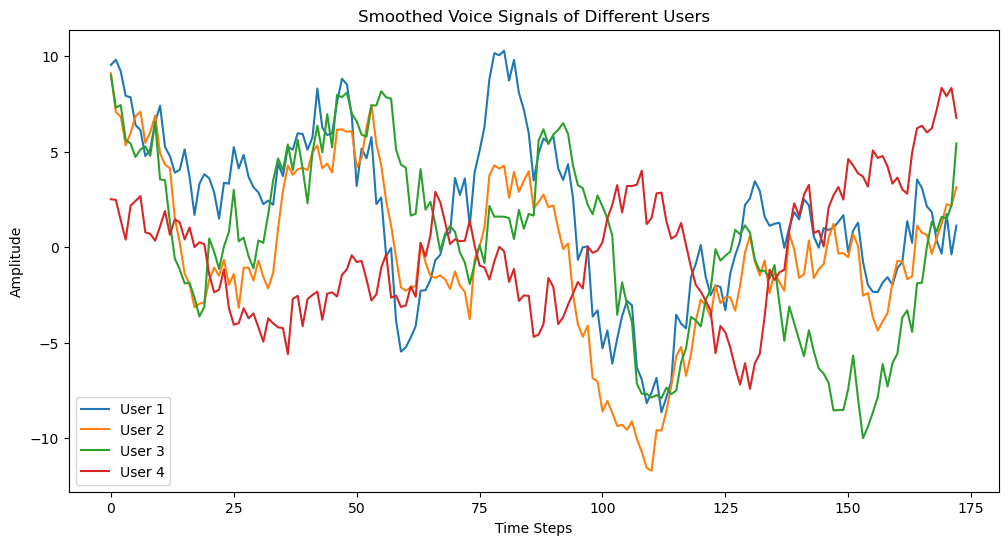

In [217]:
#Let's smoothe the voices just for visualisation and plot

# Define window size for smoothing
window_size = 20  # Adjust for more smoothing

# Function to apply moving average smoothing
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

# Plot smoothed signals
plt.figure(figsize=(12, 6))
for i in range(4):
    smoothed_signal = moving_average(user_tdnn_features[i], window_size)
    plt.plot(time[:len(smoothed_signal)], smoothed_signal, label=f"User {i+1}")

# Labels and title
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.title("Smoothed Voice Signals of Different Users")
plt.legend()
plt.show()


In [218]:
users_embeddings = pd.DataFrame(user_tdnn_features)

In [219]:
users_embeddings

0         1          2          3          4          5          6    \
0  16.215115  1.061977  13.899920  12.212759  19.507668  -1.712350   0.993827   
1  28.135227  5.236714  21.386593  11.691037  -9.449077   2.105079  -0.441769   
2  36.473106  9.678776  23.060122 -12.635661   4.002975  13.076740  -6.792723   
3   9.951545  7.628531  16.595633 -12.452263 -11.513551 -10.568922  15.876017   

         7          8          9    ...        182        183        184  \
0  -7.032940   6.827743   2.452967  ... -31.310734  61.554085  19.623095   
1  -6.539320  -4.485445  33.430477  ...  -9.148550  40.053013   5.044849   
2  11.028028 -14.920151  35.502655  ... -25.770514  31.369907   0.123942   
3  11.812292  -8.897044   6.341560  ... -19.925577  28.774309   6.351928   

         185        186        187       188        189        190        191  
0 -12.589804  -3.813845 -14.255536 -3.702873  26.023998 -17.144400  13.521561  
1   9.334233 -19.440313   4.532412  9.642295  28.034248  -2.252194 -10.762941  
2  10.734536   4.025372  -8.925062  3.694748   8.804178   6.191832   9.034907  
3  12.108794   5.414563  20.070408  5.899972   8.622739   7.587802 -35.517075  

[4 rows x 192 columns]

Let's save the user embeddings for future use

In [241]:
users_embeddings.to_csv("users4_embedding_tdnn.csv")

Let's load the csv

In [5]:
users_embeddings = pd.read_csv("users4_embedding_tdnn.csv" , index_col = None)
users_embeddings

Unnamed: 0          0         1          2          3          4  \
0           0  16.215115  1.061977  13.899919  12.212759  19.507668   
1           1  28.135227  5.236714  21.386593  11.691037  -9.449077   
2           2  36.473106  9.678776  23.060122 -12.635661   4.002975   
3           3   9.951545  7.628531  16.595633 -12.452263 -11.513551   

           5          6          7          8  ...        182        183  \
0  -1.712351   0.993827  -7.032940   6.827743  ... -31.310734  61.554085   
1   2.105079  -0.441769  -6.539320  -4.485445  ...  -9.148550  40.053013   
2  13.076740  -6.792723  11.028028 -14.920151  ... -25.770514  31.369907   
3 -10.568922  15.876017  11.812292  -8.897044  ... -19.925577  28.774310   

         184        185        186        187       188        189        190  \
0  19.623095 -12.589804  -3.813845 -14.255536 -3.702872  26.023998 -17.144400   
1   5.044849   9.334233 -19.440313   4.532412  9.642295  28.034248  -2.252194   
2   0.123942  10.734536   4.025372  -8.925062  3.694748   8.804178   6.191832   
3   6.351928  12.108794   5.414563  20.070408  5.899972   8.622739   7.587802   

         191  
0  13.521561  
1 -10.762941  
2   9.034907  
3 -35.517075  

[4 rows x 193 columns]

1.Now taking a sample amir khan's voice to imitate login. We will extract the feature same as the above then calculate the euclidean and cosine similarity with all the four audio signals and of the similarity is highest for amir khans voice then we can try with adding more users.

In [220]:
login_voic_path = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\archive\\vox1_indian\\content\\vox_indian\\id10003\\5ablueV_1tw\\00018.wav"
login_embeddings = extract_speaker_embedding(login_voic_path)

In [49]:
def cosine_euclidean_similarity(login_embedding, users_embeddings, user_list):
    for index in range(0, users_embeddings.shape[0]):
        print("Euclidean and Cosine with {}".format(user_list[index]))
        euclidean_distance = euclidean(login_embedding,users_embeddings.loc[index])
        cosine_similarity = 1 - cosine(login_embedding,users_embeddings.loc[index])
        print("Euclidean: {}".format(euclidean_distance))
        print("Cosine similarity: {}".format(cosine_similarity))

cosine_euclidean_similarity(login_embedding, users_embeddings)

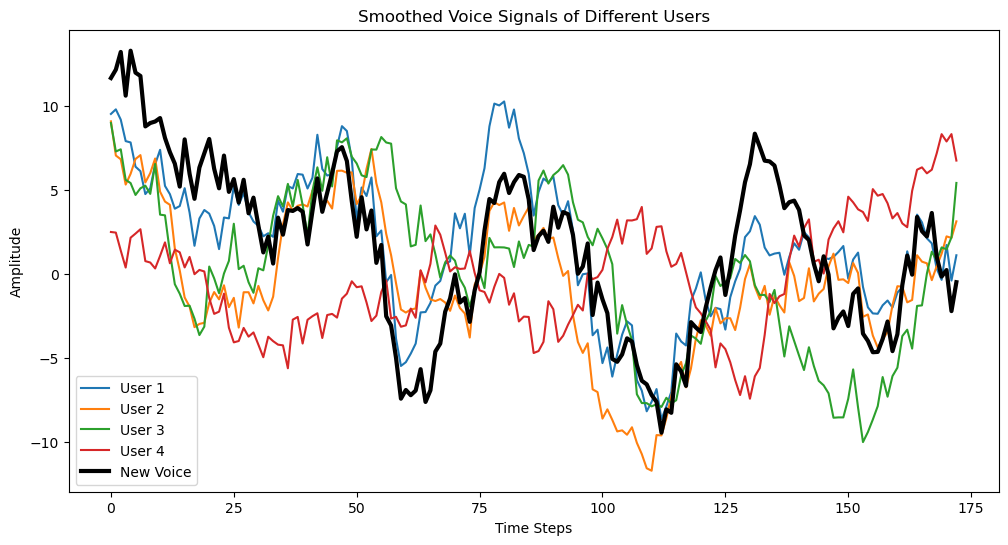

In [228]:
# Define window size for smoothing
window_size = 20  # Adjust for more smoothing

# Function to apply moving average smoothing
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

# Plot smoothed signals
plt.figure(figsize=(12, 6))
for i in range(4):
    smoothed_signal = moving_average(user_tdnn_features[i], window_size)
    plt.plot(time[:len(smoothed_signal)], smoothed_signal, label=f"User {i+1}")

# Plot the new voice in bold black
smoothed_signal_login = moving_average(login_embedding, window_size)
plt.plot( smoothed_signal_login[:len(smoothed_signal_login)], color='black', linewidth=3, label="New Voice")

# Labels and title
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.title("Smoothed Voice Signals of Different Users")
plt.legend()
plt.show()


2. Let's try with different voice of amir khan from the same user4 samples

In [230]:
login_voice_path2 = "C:\\Users\shri\\Data_Science\\Aman's_Project\\user_audio_samples\\User_4\\user_004sample1.wav"
login_embeddings2 = extract_speaker_embedding(login_voice_path2)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\shri\AppData\Local\Temp\ipykernel_10944\3610792983.py:1: SyntaxWarning: invalid escape sequence '\s'
  login_voice_path2 = "C:\\Users\shri\\Data_Science\\Aman's_Project\\user_audio_samples\\User_4\\user_004sample1.wav"


In [232]:
cosine_euclidean_similarity(login_embeddings2, users_embeddings)

Euclidean and Cosine with user_1
Euclidean: 387.67529296875
Cosine similarity: -0.014094066806161099
Euclidean and Cosine with user_2
Euclidean: 323.2856750488281
Cosine similarity: 0.09527625249745753
Euclidean and Cosine with user_3
Euclidean: 355.17529296875
Cosine similarity: 0.013415566174384774
Euclidean and Cosine with user_4
Euclidean: 131.20260620117188
Cosine similarity: 0.8420177522661071


3. It gives the best scores for the correct user4. But this is not correct way. Lets try with different voice sample which is not present in our dataset

In [234]:
login_voice_path3 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\archive\\vox1_indian\\content\\vox_indian\\id10003\\E_6MjfYr0sQ\\00024.wav"
login_embeddings3 = extract_speaker_embedding(login_voice_path3)

In [235]:
cosine_euclidean_similarity(login_embeddings3, users_embeddings)

Euclidean and Cosine with user_1
Euclidean: 417.2660827636719
Cosine similarity: -0.042890614692355555
Euclidean and Cosine with user_2
Euclidean: 350.7301940917969
Cosine similarity: 0.08460828758646477
Euclidean and Cosine with user_3
Euclidean: 367.6849670410156
Cosine similarity: 0.07779667648559307
Euclidean and Cosine with user_4
Euclidean: 187.3082275390625
Cosine similarity: 0.739991966965586


the score is highest for correct user.

lets check for user1 which is me

In [237]:
login_voice_path4 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\recorded_audio.wav"
login_embeddings4 = extract_speaker_embedding(login_voice_path4)
cosine_euclidean_similarity(login_embeddings4, users_embeddings)

Euclidean and Cosine with user_1
Euclidean: 251.37632751464844
Cosine similarity: 0.6233145871107295
Euclidean and Cosine with user_2
Euclidean: 215.71299743652344
Cosine similarity: 0.6610144633970347
Euclidean and Cosine with user_3
Euclidean: 305.6752624511719
Cosine similarity: 0.3631585938100361
Euclidean and Cosine with user_4
Euclidean: 342.7147521972656
Cosine similarity: 0.05751296965249242


It is giving better score for user_2 which is not good

5. Let's record once my voice with same text

In [72]:
def user_login_record(file_name):
    # Initialize PyAudio
    # Set recording parameters
    chunk = 1024  # Buffer size
    format = pyaudio.paInt16  # 16-bit format
    channels = 1  # Mono audio
    sample_rate = 44100  # Sample rate
    record_seconds = 5  # Duration

    p = pyaudio.PyAudio()

    print("🎤 Recording... Speak now!")
    stream = p.open(format=format, channels=channels, rate=sample_rate, input=True, frames_per_buffer=chunk)

    frames = []
    for _ in range(0, int(sample_rate / chunk * record_seconds)):
        data = stream.read(chunk)
        frames.append(data)

    print("✅ Recording finished!")

    # Stop and close stream
    stream.stop_stream()
    stream.close()
    p.terminate()

# Save the audio
    wf = wave.open(file_name, "wb")
    wf.setnchannels(channels)
    wf.setsampwidth(p.get_sample_size(format))
    wf.setframerate(sample_rate)
    wf.writeframes(b''.join(frames))
    wf.close()

    print("🎵 Audio saved as {}.wav".format(file_name))



In [ ]:
user_login_record("login_user1.wav")

Now lets compare this with the dataset

In [240]:
login_voice_path5 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\login_user1.wav"
login_embeddings5 = extract_speaker_embedding(login_voice_path5)
cosine_euclidean_similarity(login_embeddings5, users_embeddings)

Euclidean and Cosine with user_1
Euclidean: 282.4320983886719
Cosine similarity: 0.6484436134494921
Euclidean and Cosine with user_2
Euclidean: 290.766357421875
Cosine similarity: 0.5959482266216326
Euclidean and Cosine with user_3
Euclidean: 378.539794921875
Cosine similarity: 0.29609092635832723
Euclidean and Cosine with user_4
Euclidean: 405.16943359375
Cosine similarity: 0.08421555320705376


Now let's compute the MFCC features with means + variance for all the 4 users and create a pd.dataframe for them 

In [8]:
# user_audio_dir = os.path.join(os.getcwd(),"user_audio_samples")

# def extract_mfcc_mean_variance_features(user_audio_directory):
#     user_features = []
#     for user in os.listdir(user_audio_directory):
#         particular_user_path = os.path.join(user_audio_directory, user)
#         user_mfcc_sample_embeddings = []
#         for samples in os.listdir(particular_user_path):
#             sample_path = os.path.join(particular_user_path,samples)
#             print(sample_path)
#             y, sr = librosa.load(sample_path, sr=22050)  # y = audio signal, sr = sample rate
#             audio_embedding = librosa.feature.mfcc(y = y , sr = sr)
#             user_mfcc_sample_embeddings.append(audio_embedding)
#             # user_sample_features.append(embedding)
#         # user_samples_features_array = np.array(user_mfcc_sample_embeddings)
#         # print(user_samples_features_array.shape)
#         # user_features.append(np.mean(user_samples_features_array , axis = 0))
#     # user_features = np.array(user_features)
#     # print(user_features.shape)
#     return user_features
        
    


In [ ]:
user_mfcc_mean_variance_features = extract_mfcc_mean_variance_features(user_audio_dir)

In [34]:
def extract_mfcc_mean_variance_features(user_audio_directory):
    user_features = []
    
    for user in os.listdir(user_audio_directory):
        particular_user_path = os.path.join(user_audio_directory, user)
        user_mfcc_sample_embeddings = []

        for sample in os.listdir(particular_user_path):
            sample_path = os.path.join(particular_user_path, sample)
            print(sample_path)
            
            # Load audio
            y, sr = librosa.load(sample_path, sr=22050)  # Ensure same sample rate

            # Extract MFCC
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # Ensure fixed size

            # Check MFCC shape
            print(f"Shape of MFCC for {sample}: {mfcc.shape}")

            # Compute mean and variance of MFCC
            mean_mfcc = np.mean(mfcc, axis=1)  # Shape (20,)
            var_mfcc = np.std(mfcc, axis=1)    # Shape (20,)

            # Concatenate mean and variance (final shape (40,))
            mfcc_features = np.concatenate((mean_mfcc, var_mfcc))

            user_mfcc_sample_embeddings.append(mfcc_features)

        # Convert list to numpy array safely
        user_samples_features_array = np.array(user_mfcc_sample_embeddings)

        # Ensure all feature vectors are same length
        print(f"User {user} features shape: {user_samples_features_array.shape}")

        # Compute mean of all samples for this user
        user_features.append(np.mean(user_samples_features_array, axis=0))

    return np.array(user_features)  # Final shape: (num_users, feature_dim)



In [35]:
# Run feature extraction
user_mfcc_mean_variance_features = extract_mfcc_mean_variance_features(user_audio_dir)

# Print final feature shape
print("Final User Features Shape:", user_mfcc_mean_variance_features.shape)


C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanK\user_002sample1.wav
Shape of MFCC for user_002sample1.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanK\user_002sample2.wav
Shape of MFCC for user_002sample2.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanK\user_002sample3.wav
Shape of MFCC for user_002sample3.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanK\user_002sample4.wav
Shape of MFCC for user_002sample4.wav: (20, 216)
User AmanK features shape: (4, 40)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanM\user_003sample1.wav
Shape of MFCC for user_003sample1.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanM\user_003sample2.wav
Shape of MFCC for user_003sample2.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanM\user_003sample3.wav
Shape 

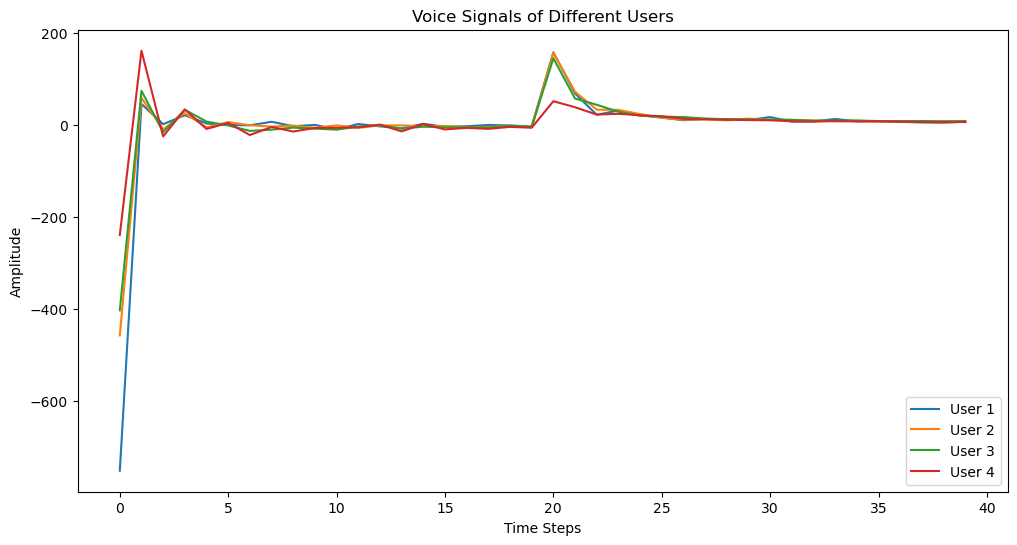

In [264]:
# let's visualise each user 
time = np.arange(40)
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.plot(time, user_mfcc_mean_variance_features[i], label=f"User {i+1}")

# Labels and title
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.title("Voice Signals of Different Users")
plt.legend()
plt.show()

In [272]:
# Let's create a dataframe of these mfcc mean variance features

user_mfcc_mean_variance_embedding = pd.DataFrame(user_mfcc_mean_variance_features)
user_mfcc_mean_variance_embedding

0           1          2          3         4         5   \
0 -751.707886   45.219948   1.194390  20.697973  2.788269 -0.575077   
1 -457.661774   58.444748  -9.967566  25.084675 -5.798145  5.781235   
2 -403.143982   73.722809 -16.173958  32.490604  6.903351 -1.569957   
3 -239.561981  160.820221 -25.305525  33.331295 -9.212658  4.114297   

          6          7          8         9   ...         30         31  \
0  -1.235555   6.446921  -3.224472 -0.427898  ...  16.692617   6.826532   
1  -1.088453  -3.972709  -1.791628 -6.826035  ...  10.416482  10.518735   
2 -13.460464 -10.633933  -6.261294 -8.490993  ...  11.319283  10.641483   
3 -22.370018  -4.800706 -14.762941 -6.960768  ...   9.654623   7.551134   

         32         33        34        35        36        37        38  \
0  7.271866  12.514111  7.421726  7.533225  6.050329  5.153462  4.312457   
1  9.438532   7.796303  8.385813  7.023318  7.898917  6.455052  4.710929   
2  8.534628   9.195695  9.280214  7.948053  7.493236  8.100688  7.570955   
3  6.844410   7.882562  7.125831  7.595183  7.147668  5.677489  6.186098   

         39  
0  6.627752  
1  6.924210  
2  7.903211  
3  5.822017  

[4 rows x 40 columns]

Let's save these features for future use

In [274]:
user_mfcc_mean_variance_embedding.to_csv("user_mfcc_mean_variance_embedding.csv")

Now it's time for comparison. For comparison we will check for the same samples for which we checked for tdnn performances 

Firstly taking a sample amir khan's voice to imitate login, extract mean_variance_mfcc_feature

In [42]:
def extract_mfcc_login_embeddings(path):
    mfcc_features = []
    y,s  = librosa.load(path , sr = 22050)
    mfcc = librosa.feature.mfcc(y=y, sr=s, n_mfcc=20)  # Ensure fixed size

    # Check MFCC shape
    # print(f"Shape of MFCC for {sample}: {mfcc.shape}")

    # Compute mean and variance of MFCC
    mean_mfcc = np.mean(mfcc, axis=1)  # Shape (20,)
    var_mfcc = np.std(mfcc, axis=1)    # Shape (20,)

    # Concatenate mean and variance (final shape (40,))
    mfcc_features = np.concatenate((mean_mfcc, var_mfcc))
    login_embedding = np.array(mfcc_features)
    # print(login_embedding.shape)
    return login_embedding

In [277]:
login_voice_path = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\archive\\vox1_indian\\content\\vox_indian\\id10003\\5ablueV_1tw\\00018.wav"
login_embedding1 = extract_mfcc_login_embeddings(login_voice_path)


cosine_euclidean_similarity(login_embedding1, user_mfcc_mean_variance_embedding)

(40,)
Euclidean and Cosine with user_1
Euclidean: 506.4371337890625
Cosine similarity: 0.8804639340031732
Euclidean and Cosine with user_2
Euclidean: 236.05422973632812
Cosine similarity: 0.912878946041693
Euclidean and Cosine with user_3
Euclidean: 179.4020233154297
Cosine similarity: 0.934311428452207
Euclidean and Cosine with user_4
Euclidean: 37.872737884521484
Cosine similarity: 0.9968569958029339


We can see that it recognises the user4(amir) with smallest euclidean and highest cosine similarity

Let's see in the plot

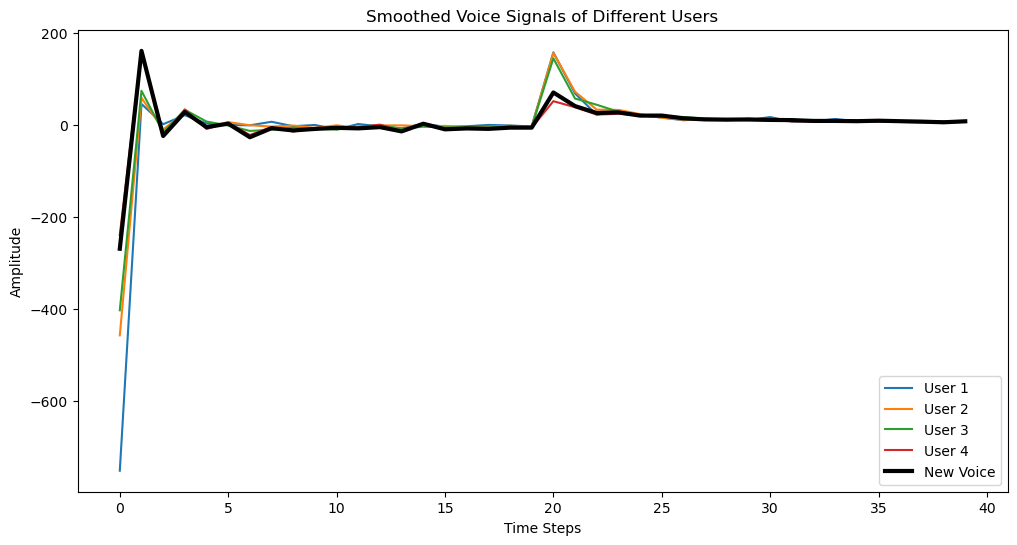

In [276]:
# Plot smoothed signals
plt.figure(figsize=(12, 6))
for i in range(4):
    # smoothed_signal = moving_average(user_tdnn_features[i], window_size)
    plt.plot(time[:len(user_mfcc_mean_variance_embedding.loc[i])], user_mfcc_mean_variance_embedding.loc[i], label=f"User {i+1}")

# Plot the new voice in bold black
# smoothed_signal_login = moving_average(login_embedding, window_size)
plt.plot(login_mfcc_mean_variance_embedding[:len(login_mfcc_mean_variance_embedding)], color='black', linewidth=3, label="New Voice")

# Labels and title
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.title("Smoothed Voice Signals of Different Users")
plt.legend()
plt.show()


2. Let's try with different voice of amir khan from the same user4 samples

In [279]:
login_voice_path2 = "C:\\Users\shri\\Data_Science\\Aman's_Project\\user_audio_samples\\User_4\\user_004sample1.wav"
login_embeddings2 = extract_mfcc_login_embeddings(login_voice_path2)

cosine_euclidean_similarity(login_embeddings2, user_mfcc_mean_variance_embedding)

(40,)
Euclidean and Cosine with user_1
Euclidean: 554.3997802734375
Cosine similarity: 0.8290176901398579
Euclidean and Cosine with user_2
Euclidean: 282.6277770996094
Cosine similarity: 0.8659338425454317
Euclidean and Cosine with user_3
Euclidean: 226.4116973876953
Cosine similarity: 0.8907052851033445
Euclidean and Cosine with user_4
Euclidean: 20.997278213500977
Cosine similarity: 0.998007385989002


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\shri\AppData\Local\Temp\ipykernel_10944\3245906409.py:1: SyntaxWarning: invalid escape sequence '\s'
  login_voice_path2 = "C:\\Users\shri\\Data_Science\\Aman's_Project\\user_audio_samples\\User_4\\user_004sample1.wav"


Correctly_recognising with best euclidean and cosine values even whent he text is different for user4 audio samples

3. It gives the best scores for the correct user4. But this is not correct way. Lets try with different voice sample which is not present in our dataset

In [281]:
login_voice_path3 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\archive\\vox1_indian\\content\\vox_indian\\id10003\\E_6MjfYr0sQ\\00024.wav"
login_embeddings3 = extract_mfcc_login_embeddings(login_voice_path3)

cosine_euclidean_similarity(login_embeddings3, user_mfcc_mean_variance_embedding)

(40,)
Euclidean and Cosine with user_1
Euclidean: 514.4650268554688
Cosine similarity: 0.8747561545422732
Euclidean and Cosine with user_2
Euclidean: 241.1201934814453
Cosine similarity: 0.9111937610365217
Euclidean and Cosine with user_3
Euclidean: 184.89901733398438
Cosine similarity: 0.9319262885640217
Euclidean and Cosine with user_4
Euclidean: 61.21026611328125
Cosine similarity: 0.9833454091694706


correctly identifies the user4 even with different text values.

4. let's check for the user1 which is me with different text

In [282]:
login_voice_path4 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\recorded_audio.wav"
login_embeddings4 = extract_mfcc_login_embeddings(login_voice_path4)
cosine_euclidean_similarity(login_embeddings4, user_mfcc_mean_variance_embedding)

(40,)
Euclidean and Cosine with user_1
Euclidean: 76.36519622802734
Cosine similarity: 0.9968697784152185
Euclidean and Cosine with user_2
Euclidean: 240.54185485839844
Cosine similarity: 0.9928211059686014
Euclidean and Cosine with user_3
Euclidean: 297.31298828125
Cosine similarity: 0.9853040540525594
Euclidean and Cosine with user_4
Euclidean: 484.6990051269531
Cosine similarity: 0.8707957300480521


best values for user1: can correctly recognise

5. Let's record once my voice with same text

In [288]:
# calling user_login_record() function which is definced above
user_login_record("login_user1_attempt2.wav")

🎤 Recording... Speak now!
✅ Recording finished!
🎵 Audio saved as login_user1_attempt2.wav.wav


In [290]:
login_voice_path5 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\login_user1_attempt2.wav"
login_embeddings5 = extract_mfcc_login_embeddings(login_voice_path5)
cosine_euclidean_similarity(login_embeddings5, user_mfcc_mean_variance_embedding)

(40,)
Euclidean and Cosine with user_1
Euclidean: 69.65872955322266
Cosine similarity: 0.9990312015463766
Euclidean and Cosine with user_2
Euclidean: 356.2593994140625
Cosine similarity: 0.9843258668872202
Euclidean and Cosine with user_3
Euclidean: 411.81793212890625
Cosine similarity: 0.9752851486935897
Euclidean and Cosine with user_4
Euclidean: 593.182861328125
Cosine similarity: 0.8595557858839871


## Conclusion:

#### I did comparison on between TDNN and MFCC(mean+variance) embeddings in 5 cases
* It is clear from the above outcomes that the MFCC(mean+variance) embeddings not only gives best values of similarity for correct user the dimentionality of MFCC is also 5 times less than TDNN.
* In all the 5 comparisons above the MFCC has correctly identified the user where as TDNN was mostly incorrect.
* Once this performance is verified for large number of users, this can be choosen as our user identification method.
* When we get more user data and the performance of MFCC decrese try increasing the cofficients of MFCC(currently 20). This can increse the performance. Should try once. 

Extracting MFCC weights for 11 users

In [44]:
user_audio_dir = os.path.join(os.getcwd(),"user_audio_samples")
# Run feature extraction
user_mfcc_mean_variance_features = extract_mfcc_mean_variance_features(user_audio_dir)

# Print final feature shape
print("Final User Features Shape:", user_mfcc_mean_variance_features.shape)

C:\Users\shri\Data_Science\Aman's_Project\user_audio_samples\AmanK\user_002sample1.wav
Shape of MFCC for user_002sample1.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\user_audio_samples\AmanK\user_002sample2.wav
Shape of MFCC for user_002sample2.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\user_audio_samples\AmanK\user_002sample3.wav
Shape of MFCC for user_002sample3.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\user_audio_samples\AmanK\user_002sample4.wav
Shape of MFCC for user_002sample4.wav: (20, 216)
User AmanK features shape: (4, 40)
C:\Users\shri\Data_Science\Aman's_Project\user_audio_samples\AmanM\user_003sample1.wav
Shape of MFCC for user_003sample1.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\user_audio_samples\AmanM\user_003sample2.wav
Shape of MFCC for user_003sample2.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\user_audio_samples\AmanM\user_003sample3.wav
Shape of MFCC for user_003sample3.wav: (20, 216)
C:\Users\shri

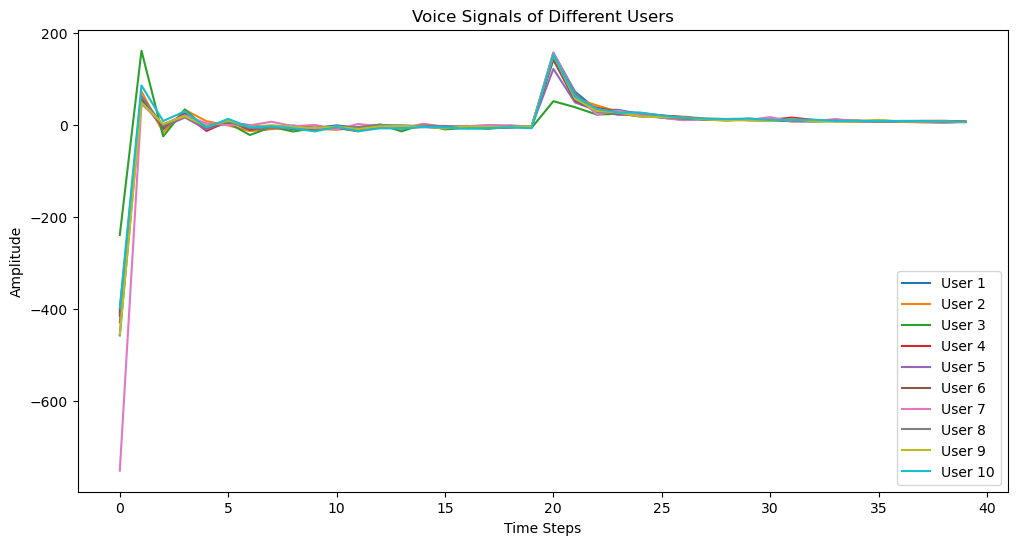

In [33]:
# let's visualise each user 
time = np.arange(40)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(time, user_mfcc_mean_variance_features[i], label=f"User {i+1}")

# Labels and title
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.title("Voice Signals of Different Users")
plt.legend()
plt.show()

In [45]:
user_mfcc_mean_variance_features9 = pd.DataFrame(user_mfcc_mean_variance_features)
user_mfcc_mean_variance_features9.to_csv("user_mfcc_mean_variance_features19")
user_mfcc_mean_variance_features9

0           1          2          3          4         5   \
0 -457.661774   58.444748  -9.967566  25.084675  -5.798145  5.781235   
1 -402.343597   72.491013 -16.916603  32.559639   7.610146 -1.464490   
2 -239.561981  160.820221 -25.305525  33.331295  -9.212658  4.114297   
3 -415.498932   51.766228  -2.282642  23.036343 -13.540738  8.009391   
4 -406.308685   50.052113  -5.456463  15.806582 -10.174147  9.193723   
5 -410.707581   53.574024  -5.410394  20.065611  -6.478572  8.107990   
6 -751.707886   45.219948   1.194390  20.697973   2.788269 -0.575077   
7 -429.442871   62.328674  -2.779538  17.703905  -2.449208  6.528908   
8 -455.895691   48.290283   1.471272  18.593128  -4.379412  9.310286   

          6         7          8          9   ...         30         31  \
0  -1.088453 -3.972709  -1.791628  -6.826035  ...  10.416482  10.518735   
1 -13.781898 -9.724760  -5.814992  -8.601821  ...  11.421848  10.818419   
2 -22.370018 -4.800706 -14.762941  -6.960768  ...   9.654623   7.551134   
3 -10.824568 -4.271432  -4.774596  -6.568170  ...  10.639997  15.555811   
4 -10.845273 -5.702480  -4.454875 -11.498611  ...  10.228956  11.955477   
5 -10.794734 -2.597844  -9.914685  -7.792319  ...   8.609630  10.413016   
6  -1.235555  6.446921  -3.224472  -0.427898  ...  16.692617   6.826532   
7  -6.996565 -7.354102  -7.399359  -6.794052  ...  10.467799   8.999036   
8  -4.810065 -0.893359  -5.018413  -7.304464  ...   7.835222  11.973749   

          32         33        34         35        36        37        38  \
0   9.438532   7.796303  8.385813   7.023318  7.898917  6.455052  4.710929   
1   8.286529   9.210968  9.310447   7.717955  7.149293  7.895793  7.170039   
2   6.844410   7.882562  7.125831   7.595183  7.147668  5.677489  6.186098   
3  10.412019   9.087977  8.308842   7.689919  8.050392  8.430067  8.564531   
4   9.593272   7.794522  8.076211   7.460239  6.864465  7.459630  5.847037   
5   7.687982   8.608397  7.101601   9.611684  6.600760  6.932088  7.383022   
6   7.271866  12.514111  7.421726   7.533225  6.050329  5.153462  4.312457   
7   8.272828   9.038922  7.685744   6.925216  6.409644  6.454665  5.869010   
8   7.700409   7.186320  6.906852  10.703917  7.174052  6.779869  7.599263   

         39  
0  6.924210  
1  7.727168  
2  5.822017  
3  7.103292  
4  5.754559  
5  6.064900  
6  6.627752  
7  5.886339  
8  6.054210  

[9 rows x 40 columns]

In [46]:
login_voice_path6 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\login_user1.wav"
login_embeddings6 = extract_mfcc_login_embeddings(login_voice_path6)
cosine_euclidean_similarity(login_embeddings6, user_mfcc_mean_variance_features9)

Euclidean and Cosine with user_1
Euclidean: 63.84779357910156
Cosine similarity: 0.9978577880599567
Euclidean and Cosine with user_2
Euclidean: 33.04991149902344
Cosine similarity: 0.9972719429404224
Euclidean and Cosine with user_3
Euclidean: 210.58010864257812
Cosine similarity: 0.904050110978094
Euclidean and Cosine with user_4
Euclidean: 35.10443115234375
Cosine similarity: 0.9972638324839447
Euclidean and Cosine with user_5
Euclidean: 31.42308235168457
Cosine similarity: 0.9975317361235806
Euclidean and Cosine with user_6
Euclidean: 29.456180572509766
Cosine similarity: 0.9978486659262894
Euclidean and Cosine with user_7
Euclidean: 351.1402282714844
Cosine similarity: 0.9823483877314336
Euclidean and Cosine with user_8
Euclidean: 39.767879486083984
Cosine similarity: 0.997850896478272
Euclidean and Cosine with user_9
Euclidean: 62.87760543823242
Cosine similarity: 0.9964315555992882


Let's compare with amir khans voice with all the embedding

In [50]:
login_voice_path7 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\archive\\vox1_indian\\content\\vox_indian\\id10003\\5ablueV_1tw\\00018.wav"
login_embeddings7 = extract_mfcc_login_embeddings(login_voice_path7)
cosine_euclidean_similarity(login_embeddings7, user_mfcc_mean_variance_features9)

Euclidean and Cosine with user_1
Euclidean: 236.05422973632812
Cosine similarity: 0.912878946041693
Euclidean and Cosine with user_2
Euclidean: 180.00746154785156
Cosine similarity: 0.9332591745042522
Euclidean and Cosine with user_3
Euclidean: 37.872737884521484
Cosine similarity: 0.9968569958029339
Euclidean and Cosine with user_4
Euclidean: 200.87075805664062
Cosine similarity: 0.9137576043732207
Euclidean and Cosine with user_5
Euclidean: 186.75245666503906
Cosine similarity: 0.9153729047989705
Euclidean and Cosine with user_6
Euclidean: 193.73143005371094
Cosine similarity: 0.9162295931736165
Euclidean and Cosine with user_7
Euclidean: 506.4371337890625
Cosine similarity: 0.8804639340031732
Euclidean and Cosine with user_8
Euclidean: 208.5003662109375
Cosine similarity: 0.9183101976715311
Euclidean and Cosine with user_9
Euclidean: 236.55250549316406
Cosine similarity: 0.9041540648569023


In [51]:
login_voice_path8 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\login_user1_manager.wav"
login_embeddings8 = extract_mfcc_login_embeddings(login_voice_path8)
cosine_euclidean_similarity(login_embeddings8, user_mfcc_mean_variance_features9)

Euclidean and Cosine with user_1
Euclidean: 102.91349029541016
Cosine similarity: 0.9843194104470233
Euclidean and Cosine with user_2
Euclidean: 56.01462173461914
Cosine similarity: 0.9921775254588895
Euclidean and Cosine with user_3
Euclidean: 183.39527893066406
Cosine similarity: 0.9374551128733559
Euclidean and Cosine with user_4
Euclidean: 77.24366760253906
Cosine similarity: 0.9856554333358822
Euclidean and Cosine with user_5
Euclidean: 81.62355041503906
Cosine similarity: 0.9824415375989063
Euclidean and Cosine with user_6
Euclidean: 76.62889099121094
Cosine similarity: 0.9851599232745913
Euclidean and Cosine with user_7
Euclidean: 383.4678039550781
Cosine similarity: 0.9525193208190672
Euclidean and Cosine with user_8
Euclidean: 81.63090515136719
Cosine similarity: 0.9861580772508738
Euclidean and Cosine with user_9
Euclidean: 108.36792755126953
Cosine similarity: 0.9795212873709127


In [52]:

for i in range(0,9):
    for j in range(0,9):
        if(i<j):
            print("Euclidean and Cosine with user_{} and user_{}".format(i+1,j+1))
            euclidean_distance = euclidean(user_mfcc_mean_variance_features9.loc[i],user_mfcc_mean_variance_features9.loc[j])
            cosine_similarity = 1 - cosine(user_mfcc_mean_variance_features9.loc[i],user_mfcc_mean_variance_features9.loc[j])
            print("Euclidean: {}".format(euclidean_distance))
            print("Cosine: {}".format(cosine_similarity))

Euclidean and Cosine with user_1 and user_2
Euclidean: 66.93013000488281
Cosine: 0.995922974676452
Euclidean and Cosine with user_1 and user_3
Euclidean: 267.7438049316406
Cosine: 0.8852727851051295
Euclidean and Cosine with user_1 and user_4
Euclidean: 53.71086502075195
Cosine: 0.9979485368125552
Euclidean and Cosine with user_1 and user_5
Euclidean: 70.42039489746094
Cosine: 0.9974939669339279
Euclidean and Cosine with user_1 and user_6
Euclidean: 58.120487213134766
Cosine: 0.9983567542060346
Euclidean and Cosine with user_1 and user_7
Euclidean: 295.8800354003906
Cosine: 0.9863329713478995
Euclidean and Cosine with user_1 and user_8
Euclidean: 35.24049758911133
Cosine: 0.999221371906132
Euclidean and Cosine with user_1 and user_9
Euclidean: 27.9751033782959
Cosine: 0.9984947979281102
Euclidean and Cosine with user_2 and user_3
Euclidean: 211.71360778808594
Cosine: 0.9075878166772423
Euclidean and Cosine with user_2 and user_4
Euclidean: 42.05664825439453
Cosine: 0.9957584149313505
E

Aman,manager
Aman, ankita
Aman, laxmi
Aman, saundarya
Aman, suryansh,
Aman, Tannu
Aman_manager, Ankita
Aman_manager, laxmi
Aman_manager, saundarya

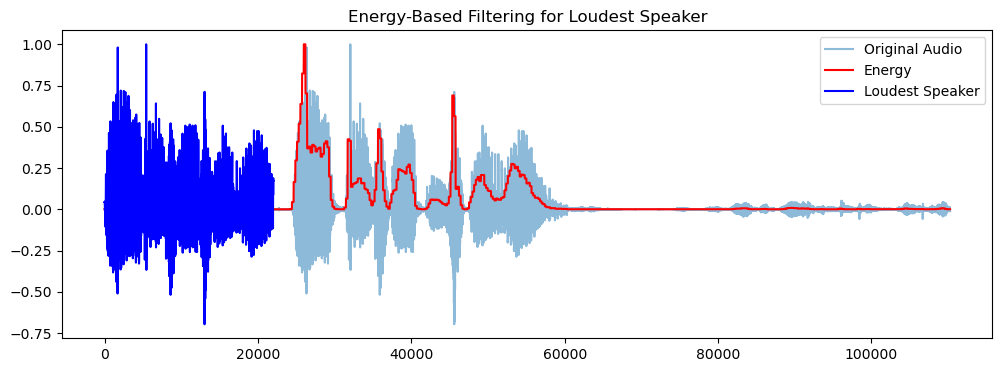

In [59]:
# Load the audio file
audio_file = "C:\\Users\\shri\\Data_Science\\Aman's_Branch\\user_audio_samples\\Vishwa\\user_008sample5.wav"  # Replace with your file
y, sr = librosa.load(audio_file, sr=22050)

# Compute Short-Time Energy (STE)
frame_length = int(0.02 * sr)  # 20ms window
hop_length = int(0.01 * sr)    # 10ms step
energy = np.array([
    sum(abs(y[i:i+frame_length]**2))
    for i in range(0, len(y) - frame_length, hop_length)  # Prevent indexing errors
])

# Apply a threshold (top 80% of energy)
threshold = np.percentile(energy, 80)

# Repeat energy values to match the length of y
energy_repeated = np.repeat(energy, hop_length)

# **Fix shape mismatch: Trim or Pad**
if len(energy_repeated) < len(y):
    energy_repeated = np.pad(energy_repeated, (0, len(y) - len(energy_repeated)), mode='edge')
else:
    energy_repeated = energy_repeated[:len(y)]  # Trim to match `y` exactly

# Keep only high-energy parts (dominant speaker)
loud_parts = y[energy_repeated > threshold]

# Plot original vs filtered signal
plt.figure(figsize=(12, 4))
plt.plot(y, alpha=0.5, label="Original Audio")
plt.plot(energy_repeated / max(energy_repeated), label="Energy", color='red')
plt.plot(np.arange(len(loud_parts)), loud_parts, label="Loudest Speaker", color='blue')
plt.legend()
plt.title("Energy-Based Filtering for Loudest Speaker")
plt.show()



In [60]:
# Save the filtered audio (Optional)
filtered_audio = AudioSegment(
    loud_parts.tobytes(), frame_rate=sr, sample_width=2, channels=1
)
filtered_audio.export("preprocessed_vishwa_sample5.wav", format="wav")

print("Filtered audio saved as 'preprocessed_vishwa_sample5.wav'")


Filtered audio saved as 'preprocessed_vishwa_sample5.wav'


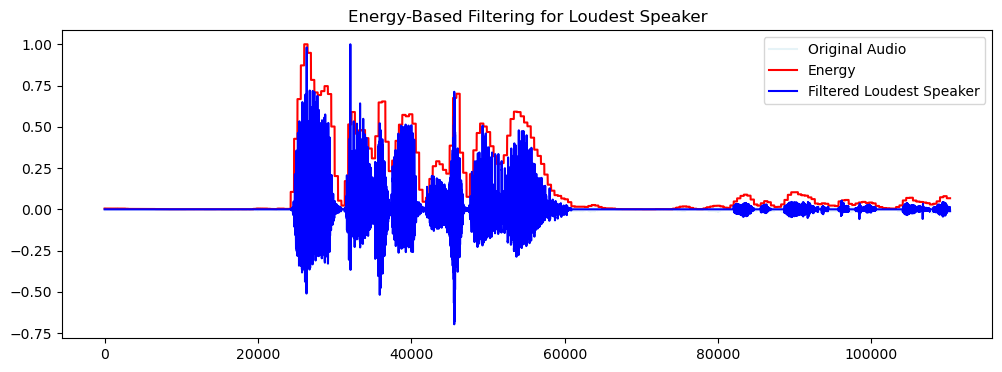

In [61]:
# Load the audio file
audio_file = "C:\\Users\\shri\\Data_Science\\Aman's_Branch\\user_audio_samples\\Vishwa\\user_008sample5.wav"
y, sr = librosa.load(audio_file, sr=22050)

# Compute Root Mean Square (RMS) Energy (better than short-time energy)
frame_length = int(0.05 * sr)  # 50ms window
hop_length = int(0.02 * sr)  # 20ms step
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]

# Apply a lower threshold (50% instead of 80%)
threshold = np.percentile(energy, 50)

# Repeat energy values to match `y` length
energy_repeated = np.repeat(energy, hop_length)
energy_repeated = energy_repeated[:len(y)]  # Trim if necessary

# Keep only high-energy parts
loud_parts = np.where(energy_repeated > threshold, y, 0)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(y, alpha=0.3, label="Original Audio", color='lightblue')
plt.plot(energy_repeated / max(energy_repeated), label="Energy", color='red')
plt.plot(loud_parts, label="Filtered Loudest Speaker", color='blue')
plt.legend()
plt.title("Energy-Based Filtering for Loudest Speaker")
plt.show()


In [62]:

# Save filtered audio
import soundfile as sf
sf.write("preprocessed_vishwa_sample5.wav", loud_parts, sr)

print("Filtered audio saved as 'preprocessed_vishwa_sample5.wav'")


Filtered audio saved as 'preprocessed_vishwa_sample5.wav'


DOes_not_work

Gating filtering method

In [64]:
pip install noisereduce

Note: you may need to restart the kernel to use updated packages.


In [66]:
import noisereduce as nr

In [81]:
# Load the audio file
audio_file = "C:\\Users\\shri\\Data_Science\\Aman's_Branch\\user_audio_samples\\Vishwa\\user_008sample5.wav"
y, sr = librosa.load(audio_file, sr=22050)

# Estimate noise profile (use the first 0.5s assuming it's mostly noise)
noise_sample = y[:int(sr * 0.5)]  

# Apply noise reduction
y_denoised = nr.reduce_noise(y=y, sr=sr, y_noise=noise_sample, prop_decrease=0.8)

# Save filtered audio
sf.write("vishwa_sample5_gating_filered_voice.wav", y_denoised, sr)

print("Filtered audio saved as 'vishwa_sample5_gating_filered_voice.wav'")

Filtered audio saved as 'vishwa_sample5_gating_filered_voice.wav'


Does not work

Trying Spleeter deep learning model


In [75]:
pip install --upgrade setuptools wheel

  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.44.0
    Uninstalling wheel-0.44.0:
      Successfully uninstalled wheel-0.44.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install spleeter==1.4.9

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement spleeter==1.4.9 (from versions: 2.1.0)
ERROR: No matching distribution found for spleeter==1.4.9


In [80]:
from spleeter.separator import Separator

ModuleNotFoundError: No module named 'spleeter'

In [79]:
python --version


NameError: name 'python' is not defined

In [ ]:


# Initialize the model (2stems: vocal + background)
separator = Separator('spleeter:2stems')

# Process the audio
separator.separate_to_file("C:\\Users\\shri\\Data_Science\\Aman's_Branch\\user_audio_samples\\Vishwa\\user_008sample5.wav", "Filtered_deeplearning_output_dirs")

print("Check 'output_dir' for separated vocals and background!")


Let's visualise a noisy audio and try to figure out how to focus on the single user voice and remove all other noise from the background

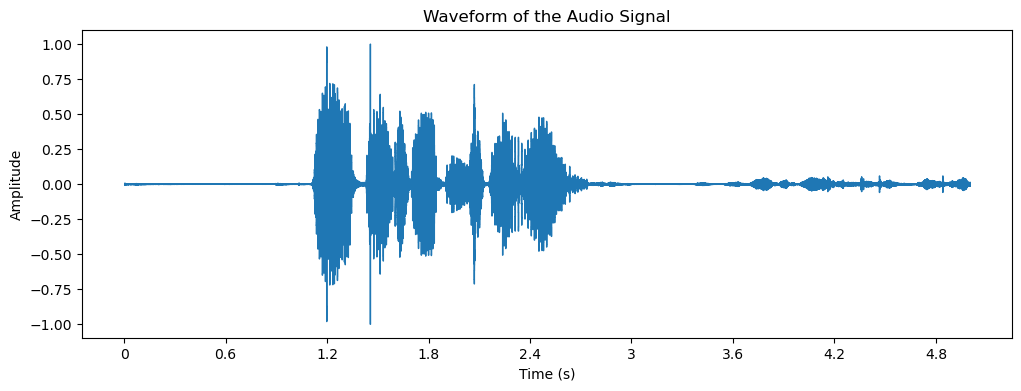

In [82]:
# Load audio file
audio_file = "C:\\Users\\shri\\Data_Science\\Aman's_Branch\\user_audio_samples\\Vishwa\\user_008sample5.wav"
y, sr = librosa.load(audio_file, sr=None)

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

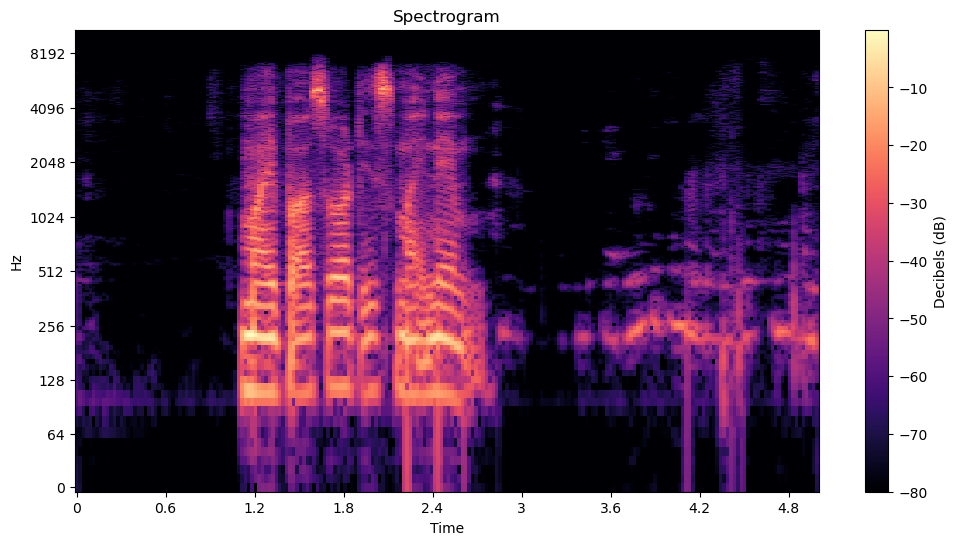

In [83]:
# Compute Short-Time Fourier Transform (STFT)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(label="Decibels (dB)")
plt.title("Spectrogram")
plt.show()


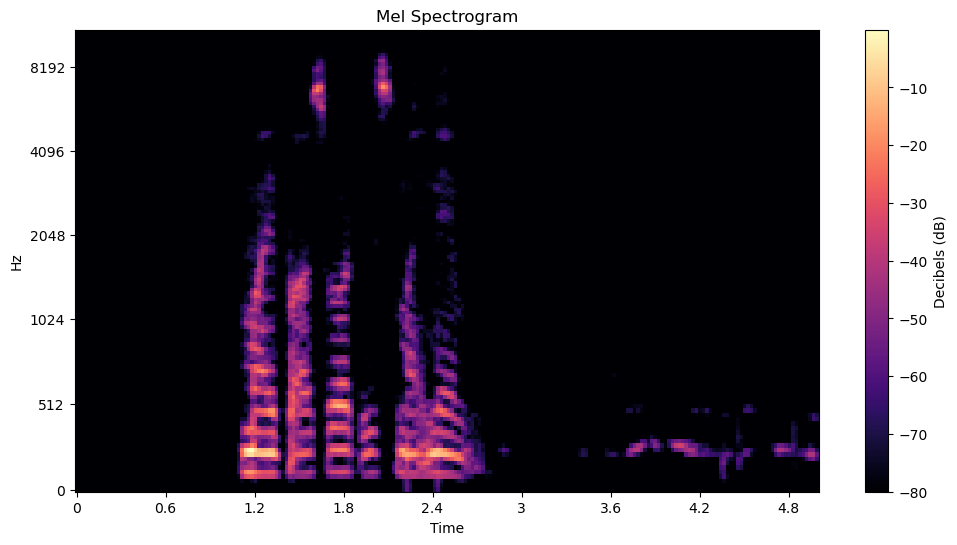

In [84]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db_mel, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(label="Decibels (dB)")
plt.title("Mel Spectrogram")
plt.show()


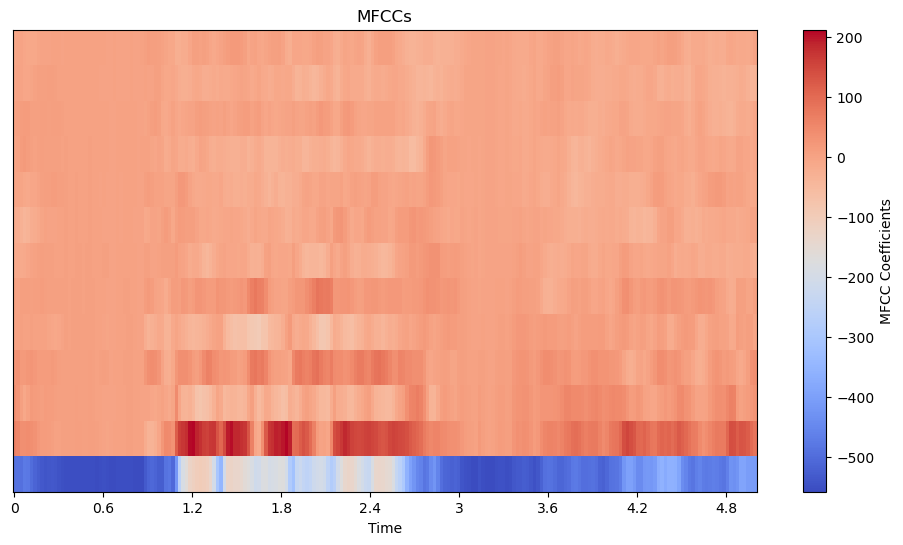

In [85]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis="time")
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCCs")
plt.show()


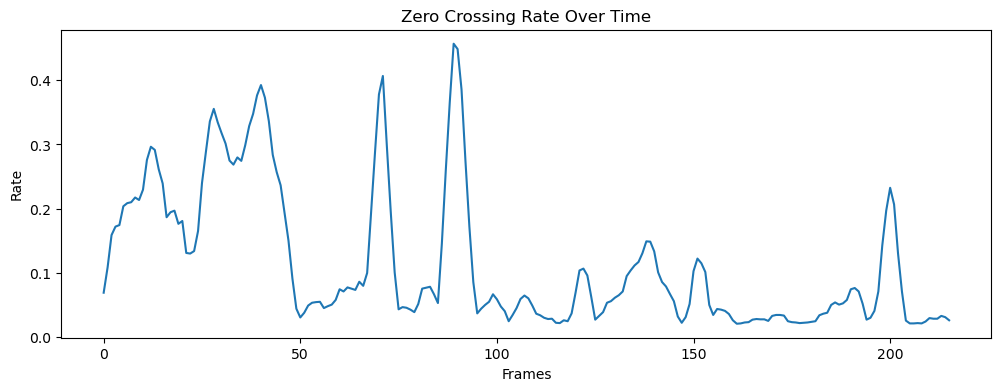

In [86]:
zcr = librosa.feature.zero_crossing_rate(y)

plt.figure(figsize=(12, 4))
plt.plot(zcr[0])
plt.title("Zero Crossing Rate Over Time")
plt.xlabel("Frames")
plt.ylabel("Rate")
plt.show()


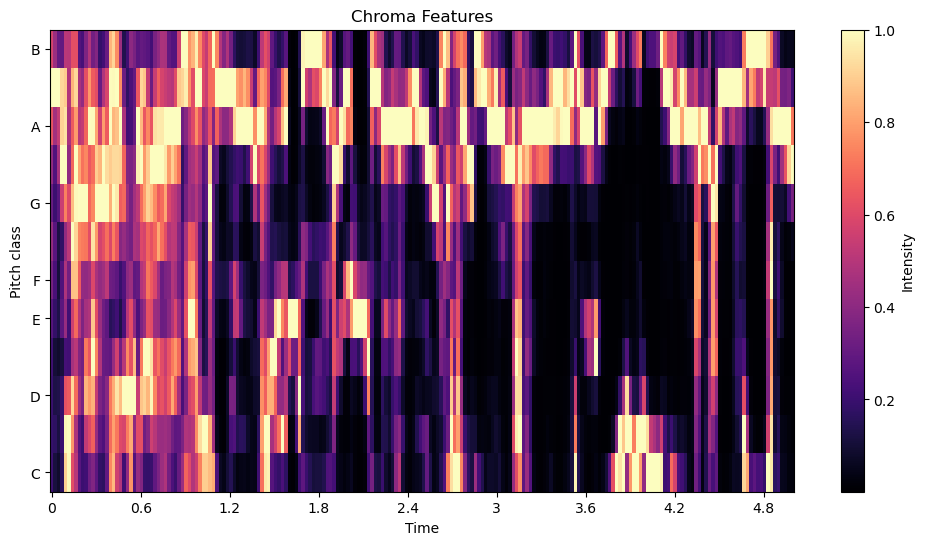

In [87]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(12, 6))
librosa.display.specshow(chroma, sr=sr, x_axis="time", y_axis="chroma")
plt.colorbar(label="Intensity")
plt.title("Chroma Features")
plt.show()


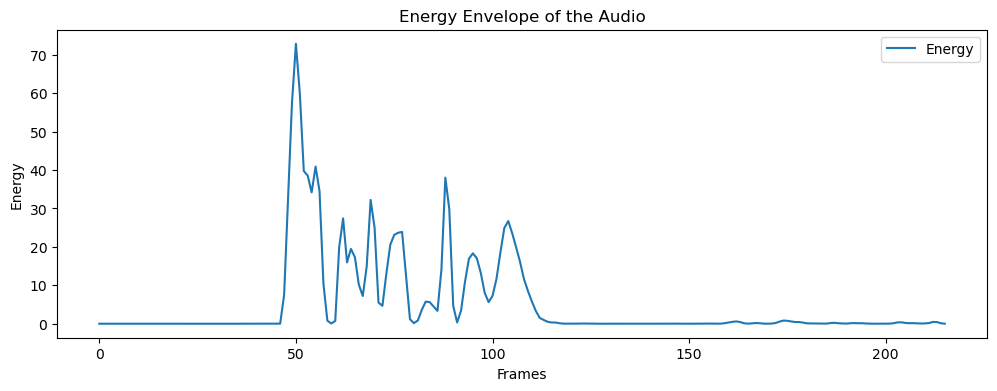

In [88]:
frame_length = 1024
hop_length = 512
energy = np.array([
    sum(abs(y[i:i+frame_length]**2)) for i in range(0, len(y), hop_length)
])

plt.figure(figsize=(12, 4))
plt.plot(energy, label="Energy")
plt.title("Energy Envelope of the Audio")
plt.xlabel("Frames")
plt.ylabel("Energy")
plt.legend()
plt.show()


In [89]:
pip install webrtcvad pydub


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for webrtcvad
Failed to build webrtcvad
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [10 lines of output]
  C:\Users\shri\anaconda3\Lib\site-packages\setuptools\_distutils\dist.py:270: UserWarning: Unknown distribution option: 'test_suite'
    warnings.warn(msg)
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312
  copying webrtcvad.py -> build\lib.win-amd64-cpython-312
  running build_ext
  building '_webrtcvad' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for webrtcvad
ERROR: Failed to build installable wheels for some pyproject.toml based projects (webrtcvad)


In [92]:
pip install Cmake

   ---------------------------------------- 0.0/36.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.5 MB ? eta -:--:--
    --------------------------------------- 0.8/36.5 MB 3.7 MB/s eta 0:00:10
   - -------------------------------------- 1.3/36.5 MB 3.5 MB/s eta 0:00:10
   -- ------------------------------------- 2.1/36.5 MB 3.7 MB/s eta 0:00:10
   --- ------------------------------------ 2.9/36.5 MB 3.2 MB/s eta 0:00:11
   --- ------------------------------------ 3.4/36.5 MB 3.2 MB/s eta 0:00:11
   ---- ----------------------------------- 3.7/36.5 MB 3.1 MB/s eta 0:00:11
   ---- ----------------------------------- 4.2/36.5 MB 3.0 MB/s eta 0:00:11
   ---- ----------------------------------- 4.5/36.5 MB 2.6 MB/s eta 0:00:13
   ----- ---------------------------------- 4.7/36.5 MB 2.5 MB/s eta 0:00:13
   ----- ---------------------------------- 5.2/36.5 MB 2.4 MB/s eta 0:00:13
   ------ --------------------------------- 5.8/36.5 MB 2.4 MB/s eta 0:00:13
   ------- --

## Today's work,, From here automatically process the audio from an origin source and saves it to the targert directory. Preprocessed audio embeddings are saved with the name preprocessed_audio_dataframe9_users and modeified extract login embedding and extract mfcc mean variance method to automatically preprocess the audio without saving it to the memory and display the name of the users it is comapring to. If everything works fine update these methods in the starting of the file too. also modified cosine_euclidean_similarity method it now takes user list as input too

In [107]:
from scipy.signal import medfilt

In [110]:
# y, sr = librosa.load("C:\\Users\\shri\\Data_Science\\Aman's_Branch\\user_audio_samples\\Tannu\\user_005sample5.wav", sr=None)
# print(sr, "here is the se")
# s_full, phase=librosa.magphase(librosa.stft(y))
# print(s_full.shape, "here is the s_full")
# noise_power=np.mean(s_full[:, :int(sr*0.03)], axis=1)
# mask=s_full>noise_power[:,None]
# mask=mask.astype(float)
# mask=medfilt(mask, kernel_size=(1,5))
# s_clean = s_full*mask
# y_clean = librosa.istft(s_clean*phase)

# # Save cleaned audio
# sf.write("denoised_user_008sample5.wav", y_clean, sr)

# print("✅ Background noise removed using Noisereduce!")

22050 here is the se
(1025, 216) here is the s_full
✅ Background noise removed using Noisereduce!


In [ ]:
def extract_mfcc_mean_variance_features(user_audio_directory):
    user_features = []
    
    for user in os.listdir(user_audio_directory):
        particular_user_path = os.path.join(user_audio_directory, user)
        user_mfcc_sample_embeddings = []

        for sample in os.listdir(particular_user_path):
            sample_path = os.path.join(particular_user_path, sample)
            print(sample_path)
            
            # Load audio
            y, sr = librosa.load(sample_path, sr=22050)  # Ensure same sample rate

            # Extract MFCC
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # Ensure fixed size

            # Check MFCC shape
            print(f"Shape of MFCC for {sample}: {mfcc.shape}")

            # Compute mean and variance of MFCC
            mean_mfcc = np.mean(mfcc, axis=1)  # Shape (20,)
            var_mfcc = np.std(mfcc, axis=1)    # Shape (20,)

            # Concatenate mean and variance (final shape (40,))
            mfcc_features = np.concatenate((mean_mfcc, var_mfcc))

            user_mfcc_sample_embeddings.append(mfcc_features)

        # Convert list to numpy array safely
        user_samples_features_array = np.array(user_mfcc_sample_embeddings)

        # Ensure all feature vectors are same length
        print(f"User {user} features shape: {user_samples_features_array.shape}")

        # Compute mean of all samples for this user
        user_features.append(np.mean(user_samples_features_array, axis=0))

    return np.array(user_features)  # Final shape: (num_users, feature_dim)



In [17]:
def preprocess(path):
    y, sr = librosa.load(path, sr=None)
    print(sr, "here is the se")
    s_full, phase=librosa.magphase(librosa.stft(y))
    print(s_full.shape, "here is the s_full")
    noise_power=np.mean(s_full[:, :int(sr*0.03)], axis=1)
    mask=s_full>noise_power[:,None]
    mask=mask.astype(float)
    mask=medfilt(mask, kernel_size=(1,5))
    s_clean = s_full*mask
    y_clean = librosa.istft(s_clean*phase)
    return y_clean,sr

The below method will automatically pick the audios from a non processed dir and put it into processed directory. It will ignore the already preprocessed user audios. So feel free to run this method without any change when you add a new users unprocesses sample to user_audio_samples_directory

In [59]:
def preprocess_audios(origin_directory, target_directory):
    for user in os.listdir(origin_directory):
        if user == ".git":  # Skip .git directory
            continue
        
        if user in os.listdir(target_directory):
            continue
        
        origin_user_path = os.path.join(origin_directory, user)
        target_user_path = os.path.join(target_directory, user)
        
        try:
            os.mkdir(target_user_path)
        except OSError as error:
            print(error)  


        for sample in os.listdir(origin_user_path):
            sample_path = os.path.join(origin_user_path, sample)
            preprocessed_sample_path = os.path.join(target_user_path, sample)
            
            # Assuming preprocess() function exists
            y_clean, sr = preprocess(sample_path)
            sf.write(preprocessed_sample_path, y_clean, sr)
            print(f"Done writing preprocessed {sample}")


In [19]:
target_path = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\preprocessed_audio_samples"
# os.mkdir("C:\\Users\\shri\\Data_Science\\Aman's_Project\\preprocessed_audio_samples")

In [20]:
os.getcwd()

"C:\\Users\\shri\\Data_Science\\Aman's_Project"

In [21]:
origin_directory = os.path.join(os.getcwd(), "user_audio_samples")
origin_directory

"C:\\Users\\shri\\Data_Science\\Aman's_Project\\user_audio_samples"

In [60]:
preprocess_audios(origin_directory,target_path)

16000 here is the se
(1025, 174) here is the s_full
Done writing preprocessed 00001.wav
16000 here is the se
(1025, 158) here is the s_full
Done writing preprocessed 00002.wav
16000 here is the se
(1025, 233) here is the s_full
Done writing preprocessed 00003.wav
16000 here is the se
(1025, 162) here is the s_full
Done writing preprocessed 00004.wav
16000 here is the se
(1025, 723) here is the s_full
Done writing preprocessed 00005.wav


Now that we have preprocessed all the voice samples and saved at a new location lets create an embedding file for these preprocessed audios

In [61]:
user_audio_dir = os.path.join(os.getcwd(),"preprocessed_audio_samples")
# Run feature extraction
user_mfcc_mean_variance_features = extract_mfcc_mean_variance_features(user_audio_dir)

# Print final feature shape
print("Final User Features Shape:", user_mfcc_mean_variance_features.shape)

C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanK\user_002sample1.wav
Shape of MFCC for user_002sample1.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanK\user_002sample2.wav
Shape of MFCC for user_002sample2.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanK\user_002sample3.wav
Shape of MFCC for user_002sample3.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanK\user_002sample4.wav
Shape of MFCC for user_002sample4.wav: (20, 216)
User AmanK features shape: (4, 40)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanM\user_003sample1.wav
Shape of MFCC for user_003sample1.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanM\user_003sample2.wav
Shape of MFCC for user_003sample2.wav: (20, 216)
C:\Users\shri\Data_Science\Aman's_Project\preprocessed_audio_samples\AmanM\user_003sample3.wav
Shape 

In [62]:
preprocessed_audio_dataframe = pd.DataFrame(user_mfcc_mean_variance_features)

In [75]:
preprocessed_audio_dataframe

0           1          2          3          4         5   \
0 -493.270905   42.061764  -6.414454  22.252258  -1.070893  2.930270   
1 -460.282227   42.695751 -11.418018  23.051765   3.533408  1.286856   
2 -369.635223  120.463013   5.156030  38.853771   8.108300 -0.097102   
3 -453.901855   31.732330  -1.838719  22.262720  -8.801313  5.903081   
4 -416.643646   95.692482 -26.472193  32.993279  19.500538 -9.226152   
5 -442.905823   30.070957  -5.402469  16.032497  -6.368349  4.919215   
6 -451.910095   34.245781  -7.788955  16.444595  -3.177982  4.471919   
7 -759.210815   40.298000   4.587210  19.048712   7.584753 -3.613378   
8 -463.945862   39.652905  -3.562541  15.752230  -2.461457  4.694026   
9 -475.189056   35.327278  -1.432585  17.983692  -3.225678  6.236038   

          6         7          8         9   ...         30         31  \
0  -3.465429 -3.606744  -2.674085 -4.234818  ...  10.529679  11.322895   
1  -6.485761 -5.640935  -3.131859 -4.886040  ...  14.053888  11.341588   
2  -8.725678 -4.524099 -13.279030 -5.686544  ...  19.574472  17.366579   
3  -8.128095 -3.460848  -4.692189 -5.755371  ...  11.232149  15.942568   
4  13.568121  3.996583  -7.222557  3.970157  ...  16.131281  17.709652   
5  -7.259001 -2.984837  -2.480524 -7.886872  ...  10.700607  13.079681   
6  -4.933997 -3.122744  -7.366915 -6.066934  ...  10.737598  10.186225   
7   1.544767  6.319594  -0.429579  0.252855  ...  18.460026   7.116725   
8  -4.397155 -2.132938  -3.525431 -4.366850  ...  13.003230   9.584579   
9  -3.683445  0.116298  -3.639294 -4.858125  ...   8.618271  12.077447   

          32         33         34         35         36         37  \
0  10.494309   8.050550   8.343158   7.075955   8.576360   7.329754   
1  10.381479   9.425528   9.442026   8.195266   8.173394   9.453935   
2  15.116647  19.293980  15.619378  16.504406  16.399734  12.515851   
3  11.645272   9.885757   9.206937   8.814231   8.301361   8.204802   
4  15.120280  14.023081  15.102071  14.970883  15.171987  15.585055   
5  11.123083   8.868896  10.056368   7.949632   7.096971   8.885360   
6   9.858923  10.518399   8.205670  11.987262   7.961899   8.353428   
7   8.913844  13.696109   7.774613   7.849054   7.797263   6.167929   
8   8.195730   9.402417   7.045765   6.521501   6.384198   7.167419   
9   9.149053   8.777433   8.039763  12.376970   7.517361   8.467234   

          38         39  
0   5.226856   8.000616  
1   8.355314   7.331006  
2  11.744791  13.832614  
3   9.567029   7.950644  
4  17.420738  21.393543  
5   6.284209   5.868311  
6   8.178300   7.901154  
7   4.846062   8.810172  
8   6.347903   5.975360  
9   8.226315   6.354313  

[10 rows x 40 columns]

preprocessed_audio_dataframe.to_csv("preprocessed_audio_dataframe9_users")

In [64]:
preprocessed_audio_dataframe.to_csv("preprocessed_audio_dataframe10_users.csv")

In [65]:
os.listdir("C:\\Users\\shri\\Data_Science\\Aman's_Project\\preprocessed_audio_samples")

['AmanK',
 'AmanM',
 'AmirK',
 'Ankita',
 'Kangana',
 'Laxmi',
 'Saundarya',
 'ShriY',
 'Suryansh',
 'Tannu']

Here I have litte bit changed the extract_mfcc_login_embeddings_2 function to automatically preprocess the login voice without saving it into the memory if it works fine. change this method above

In [66]:
def extract_mfcc_login_embeddings_2(path):
    y , s = preprocess(path)
    mfcc_features = []
    # y,s  = librosa.load(path , sr = 22050)
    mfcc = librosa.feature.mfcc(y=y, sr=s, n_mfcc=20)  # Ensure fixed size

    # Check MFCC shape
    # print(f"Shape of MFCC for {sample}: {mfcc.shape}")

    # Compute mean and variance of MFCC
    mean_mfcc = np.mean(mfcc, axis=1)  # Shape (20,)
    var_mfcc = np.std(mfcc, axis=1)    # Shape (20,)

    # Concatenate mean and variance (final shape (40,))
    mfcc_features = np.concatenate((mean_mfcc, var_mfcc))
    login_embedding = np.array(mfcc_features)
    # print(login_embedding.shape)
    return login_embedding

In [67]:
user_list = os.listdir("C:\\Users\\shri\\Data_Science\\Aman's_Project\\preprocessed_audio_samples")

In [68]:
login_voice_path8 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\login_user1_manager.wav"
login_embeddings8 = extract_mfcc_login_embeddings_2(login_voice_path8)

cosine_euclidean_similarity(login_embeddings8, preprocessed_audio_dataframe,user_list)

44100 here is the se
(1025, 431) here is the s_full
Euclidean and Cosine with AmanK
Euclidean: 64.2926283550451
Cosine similarity: 0.9926999973117154
Euclidean and Cosine with AmanM
Euclidean: 62.48886504384316
Cosine similarity: 0.9932640118029602
Euclidean and Cosine with AmirK
Euclidean: 123.74544063057533
Cosine similarity: 0.9829115948076519
Euclidean and Cosine with Ankita
Euclidean: 79.91654071908332
Cosine similarity: 0.989283478261321
Euclidean and Cosine with Kangana
Euclidean: 88.7283624164469
Cosine similarity: 0.9903353475328265
Euclidean and Cosine with Laxmi
Euclidean: 84.88210577794241
Cosine similarity: 0.9903850723560552
Euclidean and Cosine with Saundarya
Euclidean: 74.5429752804978
Cosine similarity: 0.9913314071636825
Euclidean and Cosine with ShriY
Euclidean: 290.9391508460258
Cosine similarity: 0.9807255173734376
Euclidean and Cosine with Suryansh
Euclidean: 70.34666666138033
Cosine similarity: 0.9911925218831453
Euclidean and Cosine with Tannu
Euclidean: 73.7280

it was a manager audio and it gave best result for that

Checking for saundarya login embedding

In [69]:
login_voice_path9 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\login_saundarya.wav"
login_embeddings9 = extract_mfcc_login_embeddings_2(login_voice_path9)
cosine_euclidean_similarity(login_embeddings9, preprocessed_audio_dataframe,user_list)

44100 here is the se
(1025, 431) here is the s_full
Euclidean and Cosine with AmanK
Euclidean: 64.2195594374158
Cosine similarity: 0.9947039455352295
Euclidean and Cosine with AmanM
Euclidean: 53.878988236419744
Cosine similarity: 0.9941445204222563
Euclidean and Cosine with AmirK
Euclidean: 123.0646484282075
Cosine similarity: 0.9733357727002339
Euclidean and Cosine with Ankita
Euclidean: 63.36497809142333
Cosine similarity: 0.9917047957846747
Euclidean and Cosine with Kangana
Euclidean: 89.60657897712153
Cosine similarity: 0.9844877634215691
Euclidean and Cosine with Laxmi
Euclidean: 57.20987083236051
Cosine similarity: 0.9942108522505687
Euclidean and Cosine with Saundarya
Euclidean: 54.272714013111354
Cosine similarity: 0.9939914108928918
Euclidean and Cosine with ShriY
Euclidean: 302.94909598221676
Cosine similarity: 0.9889429821049673
Euclidean and Cosine with Suryansh
Euclidean: 55.17970335185136
Cosine similarity: 0.993886052197279
Euclidean and Cosine with Tannu
Euclidean: 58.

I have recorded a voice of kangana with me talking behind, Lets record that audio into .wav and compare it

In [74]:
user_login_record("Kangana&Shri.wav")

🎤 Recording... Speak now!
✅ Recording finished!
🎵 Audio saved as Kangana&Shri.wav.wav


In [76]:
login_voice_path10 = "C:\\Users\\shri\\Data_Science\\Aman's_Project\\Kangana&Shri.wav"
login_embeddings10 = extract_mfcc_login_embeddings_2(login_voice_path10)
cosine_euclidean_similarity(login_embeddings9, preprocessed_audio_dataframe,user_list)

44100 here is the se
(1025, 431) here is the s_full
Euclidean and Cosine with AmanK
Euclidean: 64.2195594374158
Cosine similarity: 0.9947039455352295
Euclidean and Cosine with AmanM
Euclidean: 53.878988236419744
Cosine similarity: 0.9941445204222563
Euclidean and Cosine with AmirK
Euclidean: 123.0646484282075
Cosine similarity: 0.9733357727002339
Euclidean and Cosine with Ankita
Euclidean: 63.36497809142333
Cosine similarity: 0.9917047957846747
Euclidean and Cosine with Kangana
Euclidean: 89.60657897712153
Cosine similarity: 0.9844877634215691
Euclidean and Cosine with Laxmi
Euclidean: 57.20987083236051
Cosine similarity: 0.9942108522505687
Euclidean and Cosine with Saundarya
Euclidean: 54.272714013111354
Cosine similarity: 0.9939914108928918
Euclidean and Cosine with ShriY
Euclidean: 302.94909598221676
Cosine similarity: 0.9889429821049673
Euclidean and Cosine with Suryansh
Euclidean: 55.17970335185136
Cosine similarity: 0.993886052197279
Euclidean and Cosine with Tannu
Euclidean: 58.